# Assignment 1 Amazon Review Dataset

7130ICT - Data Analytics

Trimester 1 - 2021

s5172620 - Julio Pimentel Albores

s5198626 - Gabriela Almeida Monteiro

Due: Friday, 28 May 2021

## Table of contents
* [Part 1 –Basic analysis](#part1)

    * [1.1) Exploring electronics dataset](#part1.1)
        * [1.1.1) Data cleaning](#part1.1.1)
        * [1.1.2) Creation of Tablet dataset](#part1.1.2)
    * [1.2) Exploring Tablet dataset](#part1.2)
        * [1.2.1) Filtering accessories](#part1.2.1)
        * [1.2.2) Data cleaning of Tablet dataset](#part1.2.2)
        * [1.2.3) Descriptive statistics of Tablet dataset](#part1.2.3)
    * [1.3) Hypotesis](#part1.3)
* [Part 2 – Advanced Analysis](#part2)
    * [2.1) Exploratory Analysis](#part2.1)
        * [2.1.1) Brand Analysis](#part2.1.1)
        * [2.1.2) Product Analysis](#part2.1.2)
        * [2.1.3) Feature Correlation Analysis](#part2.1.3)
    * [2.2) Sentiment Analysis](#part2.2)
        * [2.2.1) Sentiment analysis across time](#part2.2.1)
        * [2.2.2) BTF-IDF analysis for all dataset](#part2.2.2)
        * [2.2.3) TF-IDF analysis for positive sentiment](#part2.2.3)
        * [2.2.4) TF-IDF analysis for negative sentiment](#part2.2.4)
        * [2.2.5) Using Lexical Score to Predict Product Rating](#part2.2.5)
    * [2.3) Time Series Analysis](#part2.3)
        * [2.3.1) Trend and Seasonality](#part2.3.1)
        * [2.3.2) Forecasting](#part2.3.2)
        * [2.3.3) Reviews by Month](#part2.3.3)
        * [2.3.4) Reviews by Day of the Week](#part2.3.4)
        * [2.3.5) Brand Sales Rank by Period](#part2.3.5)
    
  
  The files 'reviews_Electronics_5.json.gz' and 'meta_Electronics.json.gz' are required to start the code from part 1.1. The file 'assignment_tablet_data.pkl' is required to start the code from part 1.2.

## Part 1 –Basic analysis  <a class="anchor" id="part1"></a>

## 1.1) Exploring electronics dataset <a class="anchor" id="part1.1"></a>

In [74]:
#import libraries
import pandas as pd
import gzip

In [75]:
#Amazon Review Dataset
#Electronics category

#Pandas data frame
#These functions read the data into a pandas data frame (http://jmcauley.ucsd.edu/data/amazon/)
    
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

reviews_df = getDF('reviews_Electronics_5.json.gz')

reviews_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [76]:
# We are going to use only reviewerID for review references.

print("The shape of the dataset is {:,} rows and {} columns".format(reviews_df.shape[0],reviews_df.shape[1]))
print("The oldest post is from:", reviews_df['reviewTime'].min())
print("The newest post is from:", reviews_df['reviewTime'].max())
print("There are {:,} unique users ID who left a review.".format(reviews_df['reviewerID'].nunique()))
print("There are {:,} unique users Names who left a review.".format(reviews_df['reviewerName'].nunique()))
print("There are {:,} unique items.".format(reviews_df['asin'].nunique()))
print("The average rating given by customers is {:.2f}".format(reviews_df['overall'].mean()))

The shape of the dataset is 1,689,188 rows and 9 columns
The oldest post is from: 01 1, 2000
The newest post is from: 12 9, 2013
There are 192,403 unique users ID who left a review.
There are 162,859 unique users Names who left a review.
There are 63,001 unique items.
The average rating given by customers is 4.22


In [77]:
#statistical information of float/int columns
#overall values are between 1 and 5 with a mean of 4.22
#unixReviewTime is an int value of date time. It needs to be transformed.

reviews_df.describe()

,overall,unixReviewTime
count,1.689188e+06,1.689188e+06
mean,4.222779e+00,1.340571e+09
std,1.185632e+00,6.342451e+07
min,1.000000e+00,9.292320e+08
25%,4.000000e+00,1.318118e+09
50%,5.000000e+00,1.360800e+09
75%,5.000000e+00,1.385078e+09
max,5.000000e+00,1.406074e+09


In [78]:
#most of the attributes types are object. However, overall and unixReviewTime have a numerical structure. 

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689188 entries, 0 to 1689187
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   reviewerID      1689188 non-null  object 
 1   asin            1689188 non-null  object 
 2   reviewerName    1664458 non-null  object 
 3   helpful         1689188 non-null  object 
 4   reviewText      1689188 non-null  object 
 5   overall         1689188 non-null  float64
 6   summary         1689188 non-null  object 
 7   unixReviewTime  1689188 non-null  int64  
 8   reviewTime      1689188 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 128.9+ MB


In [79]:
# As seen above, the column reviewerName has some null-values which can be confirmed by: 
reviews_df['reviewerName'].isna().sum()

24730

In [80]:
#check the column "timeFormat" makes sense with the column "reviewTime"
reviews_df.head()

#the most relevant attributes are: reviewerID, reviewerName, overall, and timeFormat
#reviewText and summary have interesting information but it is unstructured
#the hypothesis is that we can predict the rating of a product based on item or user approach

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [81]:
# Now, we will look at the electronics metadata
metadata_df = getDF('meta_Electronics.json.gz')

metadata_df.head()

,asin,imUrl,description,categories,title,price,salesRank,related,brand
0,0132793040,http://ecx.images-amazon.com/images/I/31JIPhp%...,The Kelby Training DVD Mastering Blend Modes i...,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Mastering Blend Modes in A...,NaN,NaN,NaN,NaN
1,0321732944,http://ecx.images-amazon.com/images/I/31uogm6Y...,NaN,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Adobe Photoshop CS5 Crash ...,NaN,NaN,NaN,NaN
2,0439886341,http://ecx.images-amazon.com/images/I/51k0qa8f...,Digital Organizer and Messenger,"[[Electronics, Computers & Accessories, PDAs, ...",Digital Organizer and Messenger,8.15,{'Electronics': 144944},"{'also_viewed': ['0545016266', 'B009ECM8QY', '...",NaN
3,0511189877,http://ecx.images-amazon.com/images/I/41HaAhbv...,The CLIKR-5 UR5U-8780L remote control is desig...,"[[Electronics, Accessories & Supplies, Audio &...",CLIKR-5 Time Warner Cable Remote Control UR5U-...,23.36,NaN,"{'also_viewed': ['B001KC08A4', 'B00KUL8O0W', '...",NaN
4,0528881469,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [82]:
metadata_df.shape

(498196, 9)

In [83]:
# we will merge both dataframes using the product ID (asin) as a unifier.
# we will save the merged dataframe in a new variable called df
df_electronics = pd.merge(reviews_df, metadata_df, how='inner', on='asin')

In [84]:
df_electronics.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [85]:
# As expected, the merged dataframe has the same number of rows, but has 18 columns.

df_electronics.shape

(1689188, 17)

In [86]:
df_electronics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689188 entries, 0 to 1689187
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   reviewerID      1689188 non-null  object 
 1   asin            1689188 non-null  object 
 2   reviewerName    1664458 non-null  object 
 3   helpful         1689188 non-null  object 
 4   reviewText      1689188 non-null  object 
 5   overall         1689188 non-null  float64
 6   summary         1689188 non-null  object 
 7   unixReviewTime  1689188 non-null  int64  
 8   reviewTime      1689188 non-null  object 
 9   imUrl           1687975 non-null  object 
 10  description     1655511 non-null  object 
 11  categories      1689188 non-null  object 
 12  title           1643686 non-null  object 
 13  price           1639882 non-null  float64
 14  salesRank       810070 non-null   object 
 15  related         1662142 non-null  object 
 16  brand           954251 non-null   ob

### 1.1.1) Data cleaning <a class="anchor" id="part1.1.1"></a>

In [87]:
#new attribute created with datetime format
df_electronics["timeFormat"] = pd.to_datetime(df_electronics["unixReviewTime"], unit='s')

In [88]:
# source: https://datatofish.com/count-nan-pandas-dataframe/
# There are 45502 product titles that are null-values, as confirmed by:
df_electronics['title'].isna().sum()

45502

In [89]:
# Instead of dropping the observations that are null, we will reasign the dataframe with all rows that do not have
# null values in the column 'title':
# source: https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/#:~:text=To%20drop%20a%20specific%20row,to%20the%20Pandas%20drop%20function.&text=%23%20delete%20a%20few%20specified%20rows,always%20align%20to%20row%20numbers.&text=It%20can%20be%20useful%20for,have%20a%20more%20meaningful%20index.
df_electronics = df_electronics.loc[df_electronics['title'].isna() != True]

In [90]:
# Now, if we check the dataframe again, we will see that, as expected, there are no more null values in the column title.
df_electronics['title'].isna().sum()

0

In [91]:
df_electronics.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand,timeFormat
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN,2013-06-02
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN,2010-11-25
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN,2010-09-09
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN,2010-11-24
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN,2011-09-29


### 1.1.2) Creation of Tablet dataset <a class="anchor" id="part1.1.2"></a>

In [1]:
#We transform the 'title' column in lower case. 
df_electronics['title']=df_electronics['title'].str.lower()

# Now we want to filter out the observations containing the keywords: 'tablet' and "ipad"
df_tablet = df_electronics[df_electronics['title'].str.contains("tablet") | df_electronics['title'].str.contains("ipad")]

#We can use the file assignment_tablet_data.pkl to avoid loading the whole electronics dataset
df_tablet.to_pickle('assignment_tablet_data.pkl')

NameError: name 'df_electronics' is not defined

## 1.2) Exploring Tablet dataset <a class="anchor" id="part1.2"></a>

For this section, we would only require the pkl file, rather than ratings and metadata datasets. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#read pkl file of tablet and ipad items. 
df_all = pd.read_pickle('assignment_tablet_data.pkl')

df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135939 entries, 237 to 1689141
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   reviewerID      135939 non-null  object        
 1   asin            135939 non-null  object        
 2   reviewerName    134726 non-null  object        
 3   helpful         135939 non-null  object        
 4   reviewText      135939 non-null  object        
 5   overall         135939 non-null  float64       
 6   summary         135939 non-null  object        
 7   unixReviewTime  135939 non-null  int64         
 8   reviewTime      135939 non-null  object        
 9   imUrl           135939 non-null  object        
 10  description     131393 non-null  object        
 11  categories      135939 non-null  object        
 12  title           135939 non-null  object        
 13  price           134910 non-null  float64       
 14  salesRank       46938 non-null   

### 1.2.1) Filtering accessories <a class="anchor" id="part1.2.1"></a>

In [ ]:
# Using the describe function we can see that there are many items which have a very low price. These are probably 
# are accessories. So we have to get hid of them for our analysis, which will mainly focus on tablets and not 
# it's accessories. 

df_all.describe()

Text(0, 0.5, 'Number of items')

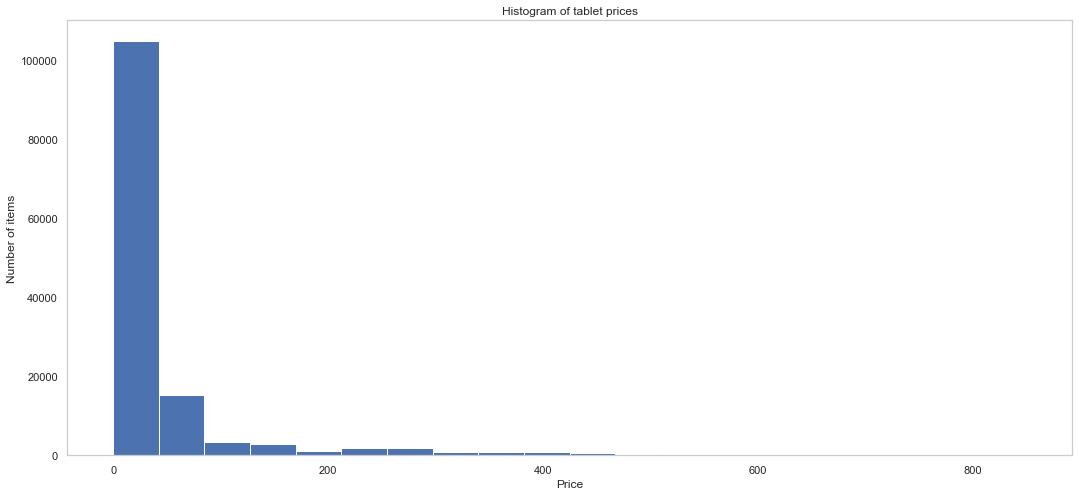

In [113]:
# After using a histogram to plot the price vs the number of items it was possible to see that most of items were 
# below $100. 
df_all["price"].hist(bins=20,grid=False)
plt.title("Histogram of tablet prices")
plt.xlabel("Price")
plt.ylabel("Number of items")

In [5]:
# After checking the Amazon website it was noticed that when tablets were filtered by price above $100
# it was less likely to include accessories. Therefore, this cut-off line was used.

# Only the reviews for products costing more than 100 are filtered, and the variable df_tablet is 
# reassigned with these observations.

df_tab = df_all[df_all['price']>100]

df_tab.describe()

,overall,unixReviewTime,price
count,12611.000000,1.261100e+04,12611.000000
mean,4.103481,1.360861e+09,260.236671
std,1.250153,3.760017e+07,123.999280
min,1.000000,1.122941e+09,100.460000
25%,4.000000,1.340755e+09,154.950000
50%,5.000000,1.370909e+09,231.150000
75%,5.000000,1.388534e+09,312.360000
max,5.000000,1.406074e+09,850.000000


### 1.2.2) Data cleaning of tablet dataset <a class="anchor" id="part1.2.2"></a>

In [6]:
# It is possible to see that, out of 12611, there are 9227 non-null values for brand.
df_tab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12611 entries, 237 to 1688828
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   reviewerID      12611 non-null  object        
 1   asin            12611 non-null  object        
 2   reviewerName    12568 non-null  object        
 3   helpful         12611 non-null  object        
 4   reviewText      12611 non-null  object        
 5   overall         12611 non-null  float64       
 6   summary         12611 non-null  object        
 7   unixReviewTime  12611 non-null  int64         
 8   reviewTime      12611 non-null  object        
 9   imUrl           12611 non-null  object        
 10  description     12566 non-null  object        
 11  categories      12611 non-null  object        
 12  title           12611 non-null  object        
 13  price           12611 non-null  float64       
 14  salesRank       4407 non-null   object        
 15

In [7]:
# In order to solve this problem, the blank cells from the brand will be populated using the 
# first words from the title of the product, which is possible to see below:
df_tab[["title","brand"]].head()

,title,brand
237,"barnes &amp; noble nook tablet 16gb (color, bn...",NaN
238,"barnes &amp; noble nook tablet 16gb (color, bn...",NaN
239,"barnes &amp; noble nook tablet 16gb (color, bn...",NaN
240,"barnes &amp; noble nook tablet 16gb (color, bn...",NaN
241,"barnes &amp; noble nook tablet 16gb (color, bn...",NaN


In [8]:
def generate_brand(product_title):
    """
    Takes the title of the product in the title column and uses the
    first word in order to populate the null cells in the 'brand' column.
    """
    generated_brand = product_title.split()[0].capitalize()
    return generated_brand


# Now, we can use the pandas apply function to apply to generate values to the newly created  column.    
df_tab['brand'].fillna(value=df_tab['title'].apply(generate_brand), inplace=True)



df_tab.head()

/Users/gabrielamonteiro/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand,timeFormat
237,A3LDPF5FMB782Z,1400501466,Alan Houston,"[3, 4]","The Nook Tablet, in both the 16gb version and ...",5.0,The BEST Color E-Reader - With Bonus Features,1336003200,"05 3, 2012",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-05-03
238,A9HYSJ3D0D6I2,1400501466,Al,"[1, 2]","I saw this product on Amazon and thought ""what...",3.0,possible lemon,1336435200,"05 8, 2012",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-05-08
239,A3EOHF2YSVZA9L,1400501466,Amazon Customer,"[1, 1]",Now I have like four different kendels and I a...,5.0,Loved it,1376524800,"08 15, 2013",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2013-08-15
240,ASH6NHZ1Z2O51,1400501466,Amazon Customer,"[1, 1]","this is excellent tablet, excellent touch scre...",5.0,"Excellent tablet, great performance",1329264000,"02 15, 2012",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-02-15
241,A3R2US71Y3CV9R,1400501466,"Amazon Customer ""pkchainsaw""","[0, 1]","I love nooks. Kindle fire is OK, but nooks are...",5.0,love the nook,1390780800,"01 27, 2014",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2014-01-27


In [9]:
# Drop duplicates based on specific columns: reviewerName, unixReviewTime, asin. And keep the last occurrence.

df_tab.drop_duplicates(subset=['reviewerName', 'unixReviewTime', 'asin'], keep='last', inplace=True)

# Drop all observations that have null values in the columns "“reviewerName”,”price”,”description”,”related”"
df_tab.dropna(subset=['price', 'description', 'related'], inplace=True)

/Users/gabrielamonteiro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/gabrielamonteiro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
# The Amazon's ratings score scale range from 1 to 5 can be interpreted as:
# 1 = "I hate it" 
# 2 = "I don't like it"
# 3 = "It's okay"
# 4 = "I like it"
# 5 = "I love it!" 

# Now, a sentiment column is created and will be populated using values originated from the 'overall' column.
# Overall scores above 3 will populate the 'sentiment' column with 1 (positive sentiment), while scores below 3 
# will populate the 'sentiment' column with 0 (negative sentiment).

df_tab["sentiment"]=np.where(df_tab["overall"]>3,1,0)
df_tab.head()

/Users/gabrielamonteiro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand,timeFormat,sentiment
237,A3LDPF5FMB782Z,1400501466,Alan Houston,"[3, 4]","The Nook Tablet, in both the 16gb version and ...",5.0,The BEST Color E-Reader - With Bonus Features,1336003200,"05 3, 2012",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-05-03,1
238,A9HYSJ3D0D6I2,1400501466,Al,"[1, 2]","I saw this product on Amazon and thought ""what...",3.0,possible lemon,1336435200,"05 8, 2012",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-05-08,0
239,A3EOHF2YSVZA9L,1400501466,Amazon Customer,"[1, 1]",Now I have like four different kendels and I a...,5.0,Loved it,1376524800,"08 15, 2013",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2013-08-15,1
240,ASH6NHZ1Z2O51,1400501466,Amazon Customer,"[1, 1]","this is excellent tablet, excellent touch scre...",5.0,"Excellent tablet, great performance",1329264000,"02 15, 2012",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-02-15,1
241,A3R2US71Y3CV9R,1400501466,"Amazon Customer ""pkchainsaw""","[0, 1]","I love nooks. Kindle fire is OK, but nooks are...",5.0,love the nook,1390780800,"01 27, 2014",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2014-01-27,1


In [11]:
#Transform the list within "helpful" column in a ratio
lst_help=[]
for i in df_tab["helpful"]:
    #if there is no data, use nan value to avoid division by 0
    if i[1]==0:
        lst_help.append(np.nan)
    else:
        lst_help.append(i[0]/i[1])
#add the list in a new column         
df_tab["helpfulRatio"]=lst_help

df_tab.head()



/Users/gabrielamonteiro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand,timeFormat,sentiment,helpfulRatio
237,A3LDPF5FMB782Z,1400501466,Alan Houston,"[3, 4]","The Nook Tablet, in both the 16gb version and ...",5.0,The BEST Color E-Reader - With Bonus Features,1336003200,"05 3, 2012",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-05-03,1,0.75
238,A9HYSJ3D0D6I2,1400501466,Al,"[1, 2]","I saw this product on Amazon and thought ""what...",3.0,possible lemon,1336435200,"05 8, 2012",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-05-08,0,0.50
239,A3EOHF2YSVZA9L,1400501466,Amazon Customer,"[1, 1]",Now I have like four different kendels and I a...,5.0,Loved it,1376524800,"08 15, 2013",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2013-08-15,1,1.00
240,ASH6NHZ1Z2O51,1400501466,Amazon Customer,"[1, 1]","this is excellent tablet, excellent touch scre...",5.0,"Excellent tablet, great performance",1329264000,"02 15, 2012",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-02-15,1,1.00
241,A3R2US71Y3CV9R,1400501466,"Amazon Customer ""pkchainsaw""","[0, 1]","I love nooks. Kindle fire is OK, but nooks are...",5.0,love the nook,1390780800,"01 27, 2014",http://ecx.images-amazon.com/images/I/41StLxJb...,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2014-01-27,1,0.00


In [12]:
#Create a month_year column
df_tab["month_year"]=df_tab["timeFormat"].dt.to_period("M")
#Create an hour column
df_tab["hour"]=df_tab["timeFormat"].dt.hour
#Create a day_week column
# df_tab["day_week"]=df_tab["timeFormat"].dt.dayofweek
df_tab["DayofWeek"]=df_tab["timeFormat"].dt.day_name()

#Create a day_month column
df_tab["day_month"]=df_tab["timeFormat"].dt.day
df_tab.head()

#It will not be possible to make an analysis for hourly purchases, only with days

print("There are",df_tab["month_year"].nunique(),"unique month_year")
print("There are",df_tab["hour"].nunique(),"unique hours")
print("There are",df_tab["DayofWeek"].nunique(),"unique days of the week")
print("There are",df_tab["day_month"].nunique(),"unique days of the month")


There are 100 unique month_year
There are 1 unique hours
There are 7 unique days of the week
There are 31 unique days of the month


/Users/gabrielamonteiro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/gabrielamonteiro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/gabrielamonteiro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [13]:
#Drop all columns that will not be used on the analysis

df_tab=df_tab.drop(columns=["reviewerName","helpful","unixReviewTime","reviewTime","imUrl"])
df_tab.head()

,reviewerID,asin,reviewText,overall,summary,description,categories,title,price,salesRank,related,brand,timeFormat,sentiment,helpfulRatio,month_year,hour,DayofWeek,day_month
237,A3LDPF5FMB782Z,1400501466,"The Nook Tablet, in both the 16gb version and ...",5.0,The BEST Color E-Reader - With Bonus Features,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-05-03,1,0.75,2012-05,0,Thursday,3
238,A9HYSJ3D0D6I2,1400501466,"I saw this product on Amazon and thought ""what...",3.0,possible lemon,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-05-08,0,0.50,2012-05,0,Tuesday,8
239,A3EOHF2YSVZA9L,1400501466,Now I have like four different kendels and I a...,5.0,Loved it,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2013-08-15,1,1.00,2013-08,0,Thursday,15
240,ASH6NHZ1Z2O51,1400501466,"this is excellent tablet, excellent touch scre...",5.0,"Excellent tablet, great performance","Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2012-02-15,1,1.00,2012-02,0,Wednesday,15
241,A3R2US71Y3CV9R,1400501466,"I love nooks. Kindle fire is OK, but nooks are...",5.0,love the nook,"Enjoy your digital books, magazines and newspa...","[[Electronics, Computers & Accessories, Tablets]]","barnes &amp; noble nook tablet 16gb (color, bn...",188.88,NaN,"{'also_bought': ['B007H564NS', 'B005HM8BRU', '...",Barnes,2014-01-27,1,0.00,2014-01,0,Monday,27


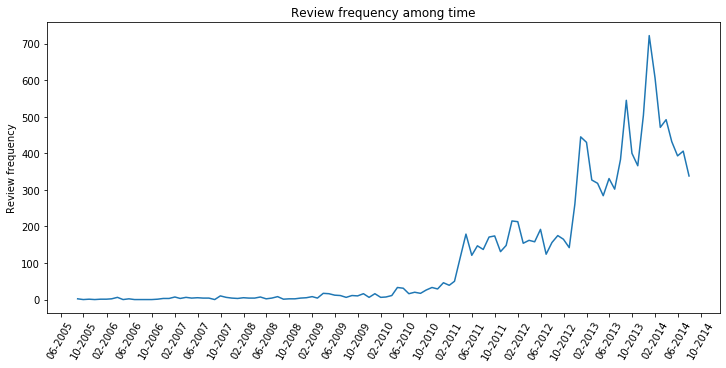

In [14]:
import matplotlib.dates as mdates
#Plot a timeseries of the frequency of reviews

#Group by timeFormat column
#Apply -> sentiment: mean and count; overall: mean
df_tab_time=df_tab.groupby("timeFormat").agg({"sentiment":["mean","count"], "overall":"mean"})
#Drop one level of column names
df_tab_time.columns = df_tab_time.columns.droplevel()

#Find min and max datetime
min_date=min(df_tab_time.index)
max_date=max(df_tab_time.index)

#Reindex the series and filling missing dates with np.nan
df_tab_time=df_tab_time.reindex(pd.date_range( min_date, max_date), fill_value=np.nan)

#Renaming the columns
df_tab_time.columns=["s_mean","s_count","o_mean"]

#Sampling the values into months
#Apply the same criteria for the functions
df_tab_time=df_tab_time.resample("M").agg({"s_mean":"mean","s_count":"sum","o_mean":"mean"})

#There are some months without reviews. In addition, it can be seen a peak of sales after 2010.
#Makes sense considering that Apple release the iPad in April 3, 2010
#Source: https://en.wikipedia.org/wiki/IPad_(1st_generation)#:~:text=The%20Wi%2DFi%20version%20of,was%20released%20on%20April%2030.

fig , ax = plt.subplots(figsize=(10,5))

#graph a barplot for the time series
ax.plot(df_tab_time.index.to_pydatetime(), df_tab_time["s_count"])
#define the xaxis as date
ax.xaxis_date()

#change the x axis format 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
#rotate the x ticks
plt.xticks(rotation=60)
plt.tight_layout()

plt.title("Review frequency among time")
plt.ylabel("Review frequency")

plt.show()

In [111]:

# Data starts to become relevant starting from April/2010, when Apple released the iPad. 
# Based on that, only data after April/2010 was considered for the purpose of this analysis

df_tab=df_tab[df_tab["timeFormat"]>'2010-04-01'] 

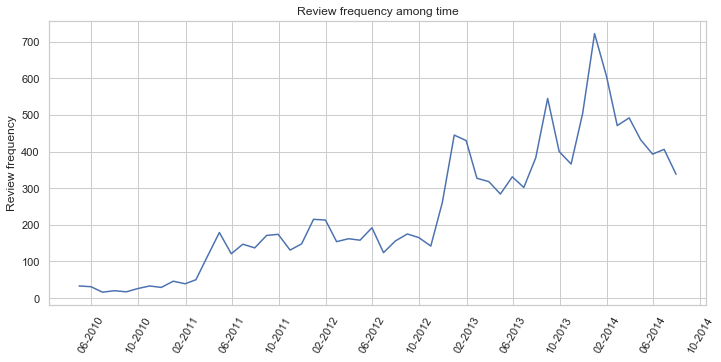

In [112]:
#Plot a timeseries of the frequency of reviews

#Group by timeFormat column
#Apply -> sentiment: mean and count; overall: mean
df_tab_time=df_tab.groupby("timeFormat").agg({"sentiment":["mean","count"], "overall":"mean"})
#Drop one level of column names
df_tab_time.columns = df_tab_time.columns.droplevel()

#find min and max datetime
min_date=min(df_tab_time.index)
max_date=max(df_tab_time.index)

#reindex the series and filling missing dates with np.nan
df_tab_time=df_tab_time.reindex(pd.date_range( min_date, max_date), fill_value=np.nan)

#renaming the columns
df_tab_time.columns=["s_mean","s_count","o_mean"]

#Sampling the values into months
#Apply the same criteria for the functions
df_tab_time=df_tab_time.resample("M").agg({"s_mean":"mean","s_count":"sum","o_mean":"mean"})

fig , ax = plt.subplots(figsize=(10,5))

#graph a barplot for the time series
ax.plot(df_tab_time.index.to_pydatetime(), df_tab_time["s_count"])
#define the xaxis as date
ax.xaxis_date()

#change the x axis format 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
#rotate the x ticks
plt.xticks(rotation=60)
plt.tight_layout()

plt.title("Review frequency among time")
plt.ylabel("Review frequency")

plt.show()

In [17]:
df_tab_time.head()

,s_mean,s_count,o_mean
2010-04-30,0.755208,33.0,4.067708
2010-05-31,0.570175,31.0,3.456140
2010-06-30,0.642857,16.0,3.857143
2010-07-31,0.690476,20.0,4.190476
2010-08-31,0.800000,17.0,4.100000


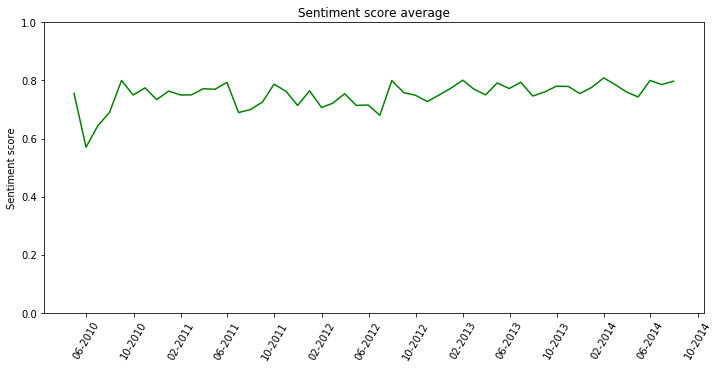

In [18]:
fig , ax = plt.subplots(figsize=(10,5))


#graph a barplot for the time series
ax.plot(df_tab_time.index.to_pydatetime(), df_tab_time["s_mean"], color="green")
#define the xaxis as date
ax.xaxis_date()

#change the x axis format 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))

#rotate the x ticks
plt.xticks(rotation=60)
plt.tight_layout()

plt.title("Sentiment score average")
plt.ylabel("Sentiment score")
plt.ylim(0,1)

plt.show()

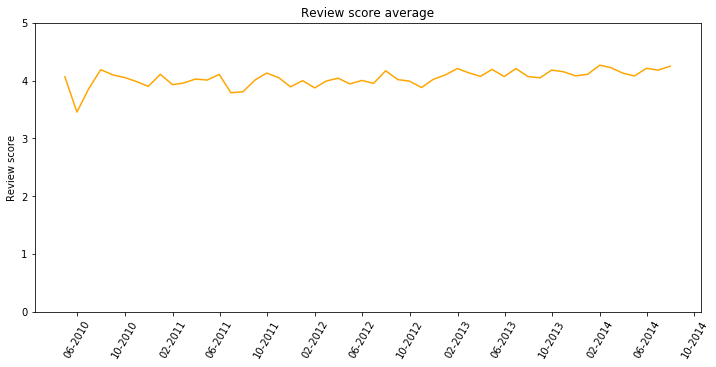

In [19]:
fig , ax = plt.subplots(figsize=(10,5))

#graph a barplot for the time series
ax.plot(df_tab_time.index.to_pydatetime(), df_tab_time["o_mean"], color="orange")
#define the xaxis as date
ax.xaxis_date()

#change the x axis format 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))

#rotate the x ticks
plt.xticks(rotation=60)
plt.tight_layout()

plt.title("Review score average")
plt.ylabel("Review score")
plt.ylim(0,5)

plt.show()

### 1.2.3) Descriptive statistics of Tablet dataset <a class="anchor" id="part1.2.3"></a>

In [20]:
# Descriptive statistics

# Now that we finished cleaning our dataset, let's have a look at it.

print("================ Descriptive Statistics ================")
print()
print("The shape of the dataset is {:,} rows and {} columns.".format(df_tab.shape[0],df_tab.shape[1]))
print("The oldest post is from: {:%d/%m/%y}".format(df_tab['timeFormat'].min()))
print("The newest post is from: {:%d/%m/%y}".format( df_tab['timeFormat'].max()))
print("There are {:,} unique users ID who left a review.".format(df_tab['reviewerID'].nunique()))
print("There are {:,} unique products.".format(df_tab['title'].nunique()))
print("There are {:,} unique brands.".format(df_tab['brand'].nunique()))
print("There are {:,} good reviews.".format((df_tab['sentiment']==1).sum()))
print("There are {:,} bad reviews.".format((df_tab['sentiment']==0).sum()))
print("The average rating given by customers is {:.2f}.".format(df_tab['overall'].mean()))

================ Descriptive Statistics ================

The shape of the dataset is 12,276 rows and 19 columns.
The oldest post is from: 04/04/10
The newest post is from: 23/07/14
There are 10,688 unique users ID who left a review.
There are 312 unique products.
There are 125 unique brands.
There are 9,410 good reviews.
There are 2,866 bad reviews.
The average rating given by customers is 4.10.


## 1.3) Hypothesis <a class="anchor" id="part1.3"></a>

In [21]:
########## HYPOTHESIS ##########

# Which brands have more reviews and how are their products perceived by customers? 
# How is the evolution of sales per brand over time? 
# Which tablet is more popular in sales amongst customers? 
# What are the top 5 most reviewed products? 
# Is there a correlation between price and ratings? 
# Does rating affect the number of reviews? 
# What are the positive and negative words associated with the reviews? 
# Word cloud for different ratings, brand name etc 
# Can we predict ratings based on reviews text analysis? 
# Can we detect temporal buying/reviewing trends?  
# Is there a correlation between specific times of the day and purchasing behaviour? 
# Have large events influenced the evolution of brands during the years? 
# How have the brands’ sales rank changed over time? 

# Part 2: Advanced Analysis <a class="anchor" id="part2"></a>

## 2.1) Exploratory Analysis <a class="anchor" id="part2.1"></a>

### 2.1.1) Brand Analysis <a class="anchor" id="part2.1.1"></a>

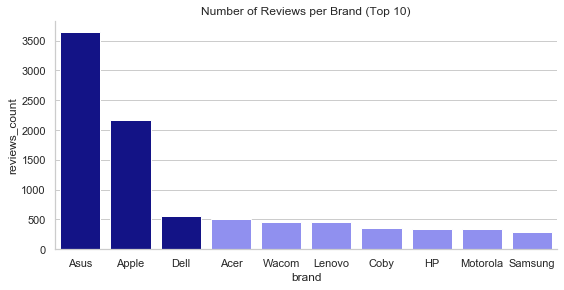

In [120]:
'''Apple and Asus are way ahead of their concurrents in terms of reviews.'''

# Filter the top 10 brands with the highest number of reviews.
top_10_brands = pd.DataFrame(df_tab['brand'].value_counts()[:10])
top_10_brands.reset_index(inplace=True)
top_10_brands.columns= ['brand', 'reviews_count']
top_10_brands

col_list=["#000099"]*3 + ["#8080ff"]*7

# Plot the top 10 brands, by number of reviews received.
g = sns.catplot(x="brand", y="reviews_count",
                data=top_10_brands, kind="bar",
                height=4, aspect=2, palette=sns.color_palette(col_list,10));

# g.set_title('Distribution of Reviews per Brand')
plt.title('Number of Reviews per Brand (Top 10)')
plt.show()

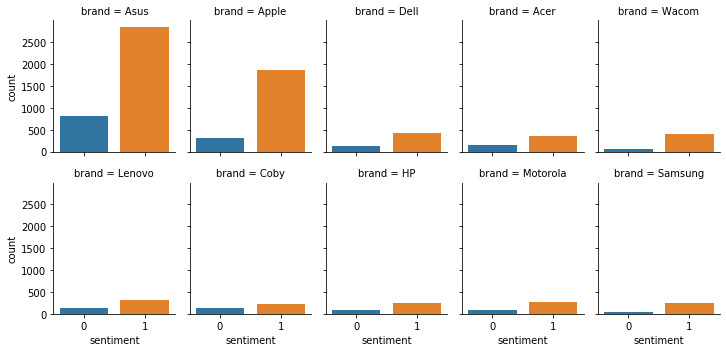

In [23]:
'''Analysis: All top 10 brands have more positive than negative reviews. However, Apple and Asus show a significant
number of positive reviews compared to negative. In fact, from the plot, it is possible to see that the more reviews 
a company has, more likely they are of having positive reviews, and therefore, being at the top.'''


# Look at the number of positive and negative reviews for the top 10 most reviewed brands.

# Create a list with the order that we would like to display in the plot.
list_10 = top_10_brands['brand'].unique()

subset_df_top_10_brands = df_tab[df_tab['brand'].isin(list_10)]

g = sns.catplot(x="sentiment", col="brand", col_wrap=5,
                data=subset_df_top_10_brands,
                kind="count", height=2.5, aspect=.8, col_order=list_10)

#source: https://www.geeksforgeeks.org/python-seaborn-catplot/

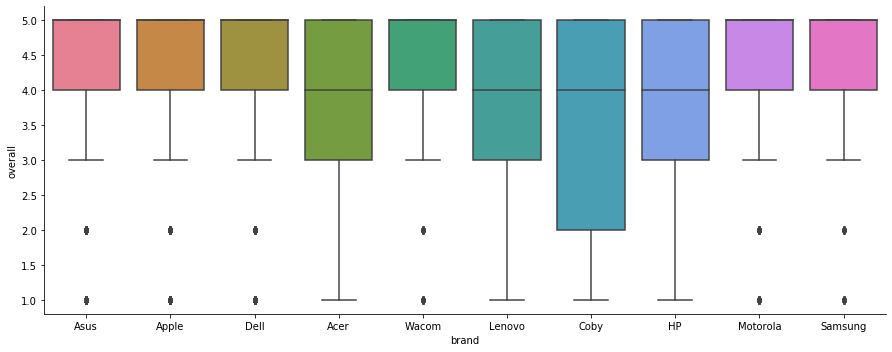

In [24]:
'''Analysis: Customers from the top 4 brands are happy with their purchases, with few outliers. Similarly, customers of
brands in position 9 and 10, are generally satisfied with their products.
Brands ranked between the 5th and 8th position have the worse performance in the top 10 group. These are Acer, Lenovo,
Coby and HP. Special attention to Coby, where customers ratings are more distributed than the other brands.

Future research: It could be interesting to look at what the outliers are saying because they can be an important 
source for insights for future improvements.'''

# Boxplot representing the ratings by brands.
g = sns.catplot(x="brand", y="overall",
                data=subset_df_top_10_brands, 
                kind="box", order=list_10,
                height=5, aspect=2.5, palette="husl")


Text(0.5, 1.0, 'Sales on Amazon, per Brand')

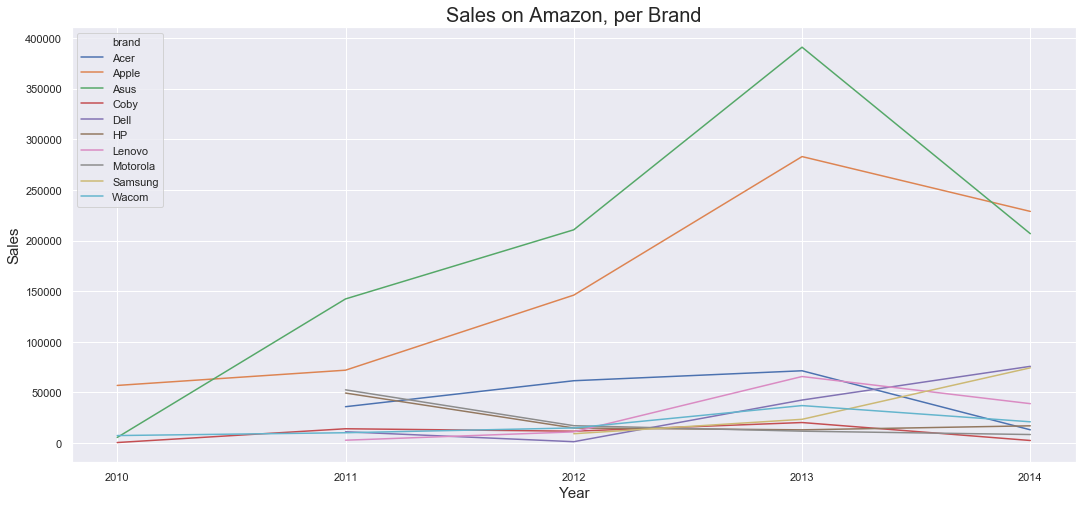

In [128]:
'''Analysis: A number of interesting facts can be spotted from this plot. First, Apple was at the top of tablets sales 
until the middle of 2010. Then, Asus took the lead, and Apple stayed in the second position until the end of 2013, when
it took over the first position again. The year of 2013 seems to have impacted the sales of most brands, which see their
demand dwingle, except for Samsung and Dell. Samsung and Dell follow an upward trend during the whole period. '''

# creating a column to store the year of the review
subset_df_top_10_brands['year'] = pd.DatetimeIndex(subset_df_top_10_brands['timeFormat']).year

# creating a new subset with brand, year and total sales (sales = sum of prices of each product, by brand)
sales_per_year_by_brand = subset_df_top_10_brands.groupby(['brand', 'year'])['price'].sum()

pd.DataFrame(sales_per_year_by_brand)

sales_per_year_by_brand = sales_per_year_by_brand.reset_index()

#sns.set(style="darkgrid")
g = sns.lineplot(x='year', y='price', hue='brand', 
               data=sales_per_year_by_brand, sizes=(.25, 2.5))
g.set_xticks(range(2010, 2015)) # setting the ticks first
g.set_xticklabels(['2010','2011','2012','2013','2014'])

plt.ylabel('Sales', size=15)
plt.xlabel('Year', size=15)
plt.title('Sales on Amazon, per Brand', size=20)



### 2.1.2) Product Analysis <a class="anchor" id="part2.1.2"></a>

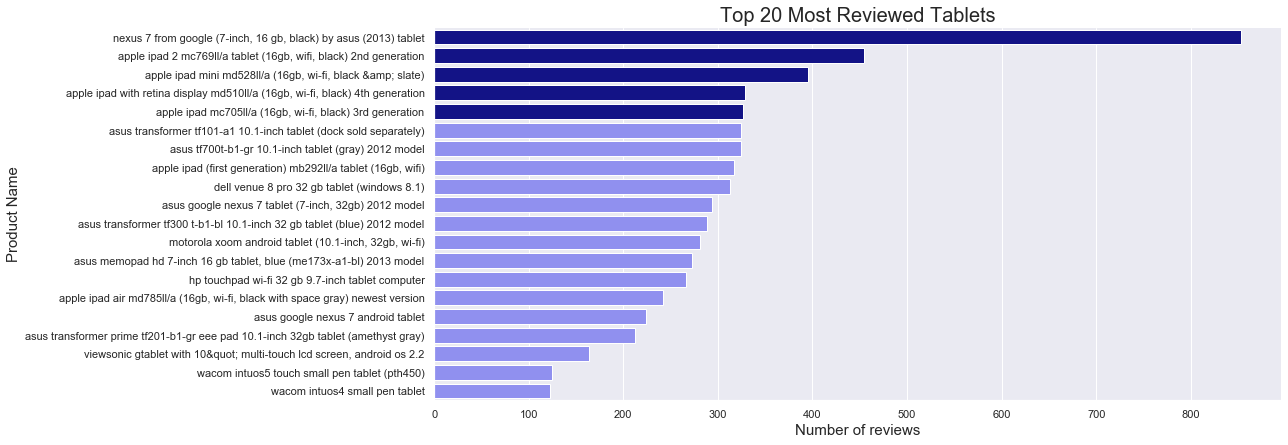

In [27]:
'''Analysis: We can see that Apple ipads dominate the market and are on the top of reviews, competing with Asus 
tablets.''' 

# Now let's look at the top most reviewed tablets.
top_20_products = pd.DataFrame(df_tab['title'].value_counts()[:20])
top_20_products.reset_index(inplace=True)
top_20_products.columns= ['product', 'reviews_count']
top_20_products

col_list=["#000099"]*5 + ["#8080ff"]*15

g2 = sns.catplot(x="reviews_count", y="product",
                data=top_20_products, kind="bar",
                height=6, aspect=3,palette=sns.color_palette(col_list,20))



plt.xlabel("Number of reviews", size = 15)
plt.ylabel("Product Name", size = 15)
plt.title("Top 20 Most Reviewed Tablets", size=20)

plt.show()

### 2.1.3) Feature Correlation Analysis <a class="anchor" id="part2.1.3"></a>

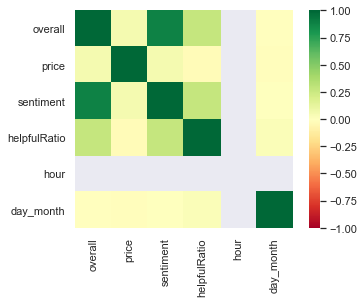

In [28]:
# From the heatmap it is possible to see that there are no relevant correlations between the numerical variables.
# The only features that are strongly correlated are sentiment and overall, as expected,
# since sentiment was a feature derived from overall rating.
# It is also possible to check that price and ratings are not related.


ax = sns.heatmap(df_tab.corr(), square=True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.show()

## 2.2) Sentiment Analysis <a class="anchor" id="part2.2"></a>

### 2.2.1) Sentiment analysis across time <a class="anchor" id="part2.2.1"></a>

Text(0.5, 0, '')

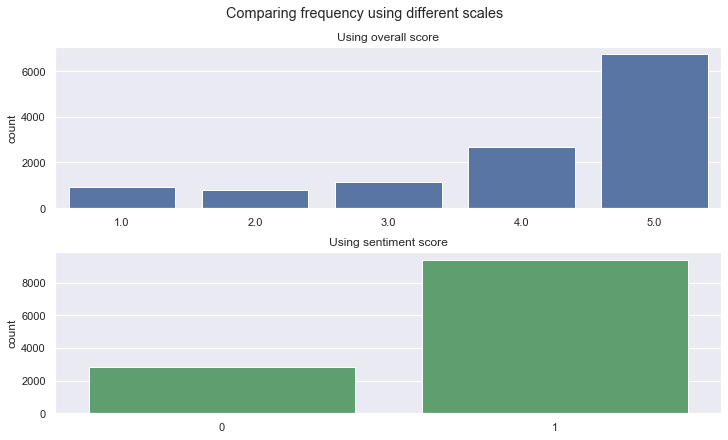

In [29]:
#import seaborn and matplotlib.pyplot
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#create two subplots and define figsize
fig, ax = plt.subplots(2, figsize=(10,6),constrained_layout=True)

#Main title
fig.suptitle("Comparing frequency using different scales")

#First ax title
ax[0].set_title("Using overall score")
#plot frequency count of overall score
sns.countplot(ax=ax[0],x="overall",data=df_tab,color="b")
ax[0].set_xlabel("")

#Second ax title
ax[1].set_title("Using sentiment score")
#ax[1].set_xtitle("")
#plot frequency count of response score
sns.countplot(ax=ax[1],x="sentiment",data=df_tab,color="g")
ax[1].set_xlabel("")

In [30]:
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.corpus import movie_reviews
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

In [31]:
from __future__ import print_function, division
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk
nltk.download('punkt')
import string
from nltk.corpus import stopwords
import math
from collections import Counter
nltk.download('stopwords')
import pprint 
pp = pprint.PrettyPrinter(indent=4)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gabrielamonteiro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gabrielamonteiro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
#Split the df by sentiment
#We are only going to use the reviewText and sentiment columns
pos_corpus=df_tab[df_tab["sentiment"]==1][["reviewText","sentiment"]]
neg_corpus=df_tab[df_tab["sentiment"]==0][["reviewText","sentiment"]]

pos_corpus.head(4)

,reviewText,sentiment
237,"The Nook Tablet, in both the 16gb version and ...",1
239,Now I have like four different kendels and I a...,1
240,"this is excellent tablet, excellent touch scre...",1
241,"I love nooks. Kindle fire is OK, but nooks are...",1


In [33]:
#Function to normalise each word
def normalise(document):
    #Remove punctuation
    text = "".join([ch for ch in document if ch not in string.punctuation])
    #Tokenise text
    tokens = nltk.word_tokenize(text)
    #Apply Porter steamming
    stemmer = PorterStemmer()
    ret = " ".join([stemmer.stem(word.lower()) for word in tokens])
    return ret

#Create a list of words for each review 
pos_docs=[x.strip() for x in pos_corpus["reviewText"] ]
#Normalise each word of the reviews and include the value 1 (positive)
pos_words=[(normalise(d).split(), "pos") for d in pos_docs]

#same case with negative reviews
neg_docs=[x.strip() for x in neg_corpus["reviewText"] ]
neg_words=[(normalise(d).split(), "neg") for d in neg_docs]

pos_words[0]

(['the',
  'nook',
  'tablet',
  'in',
  'both',
  'the',
  '16gb',
  'version',
  'and',
  '8',
  'gb',
  'version',
  'are',
  'the',
  'best',
  'color',
  'eread',
  'of',
  '2012',
  'both',
  'are',
  'bargain',
  'when',
  'purchas',
  'at',
  'the',
  'discount',
  'price',
  'barn',
  'nobl',
  'provid',
  'to',
  'it',
  'membershowev',
  'they',
  'are',
  'design',
  'for',
  'readingif',
  'you',
  'want',
  'a',
  'game',
  'tablet',
  'a',
  'skype',
  'video',
  'tablet',
  'or',
  'need',
  'access',
  'to',
  'thousand',
  'of',
  'app',
  'you',
  'need',
  'an',
  'ipadi',
  'have',
  'own',
  'a',
  'brand',
  'x',
  'color',
  'eread',
  'for',
  'about',
  'a',
  'year',
  'but',
  'seldom',
  'use',
  'it',
  'for',
  'read',
  'becaus',
  'it',
  'caus',
  'eye',
  'strain',
  'i',
  'have',
  'a',
  'nook',
  'simpl',
  'touch',
  'eread',
  'that',
  'is',
  'wonder',
  'for',
  'book',
  'but',
  'it',
  'eink',
  'screen',
  'is',
  'black',
  'on',
  'whit

In [34]:
#The length of positive and negative reviews 
len(pos_words), len(neg_words)

(9410, 2866)

In [35]:
from sklearn.model_selection import train_test_split

train_pos_docs, test_pos_docs = train_test_split(pos_words, test_size=0.2,random_state=42)
train_neg_docs, test_neg_docs = train_test_split(neg_words, test_size=0.2,random_state=42)

training_docs = train_pos_docs + train_neg_docs
testing_docs = test_pos_docs + test_neg_docs

sentim_analyzer = SentimentAnalyzer()
all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_docs])

all_words_neg[:5]

['i', 'bought', 'thi', 'for', 'my']

In [36]:

unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
print(len(unigram_feats))
sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)

9752


In [37]:

training_set = sentim_analyzer.apply_features(training_docs)
test_set = sentim_analyzer.apply_features(testing_docs)
print(training_set[0])

({'contains(the_NEG)': False, 'contains(to_NEG)': False, 'contains(and_NEG)': False, 'contains(a_NEG)': False, 'contains(it_NEG)': False, 'contains(i_NEG)': False, 'contains(is_NEG)': False, 'contains(the)': True, 'contains(of_NEG)': False, 'contains(for_NEG)': False, 'contains(that_NEG)': False, 'contains(i)': True, 'contains(thi_NEG)': False, 'contains(you_NEG)': False, 'contains(on_NEG)': False, 'contains(with_NEG)': False, 'contains(and)': True, 'contains(in_NEG)': False, 'contains(it)': True, 'contains(have_NEG)': False, 'contains(but_NEG)': False, 'contains(a)': True, 'contains(my_NEG)': False, 'contains(tablet_NEG)': False, 'contains(not_NEG)': False, 'contains(to)': True, 'contains(use_NEG)': False, 'contains(is)': True, 'contains(as_NEG)': False, 'contains(be_NEG)': False, 'contains(are_NEG)': False, 'contains(thi)': True, 'contains(for)': True, 'contains(or_NEG)': False, 'contains(wa_NEG)': False, 'contains(so_NEG)': False, 'contains(can_NEG)': False, 'contains(ipad_NEG)': Fa

In [38]:
# '''This part of the code takes time to run.'''

# #The precision for negative sentiment is 0.48. Meanwhile, the precision for postivie sentiment is 0.84. 
# #The overall accuracy is 0.74. This model can be improved if the amount of positive and negative data are similar. 

# naive_bayes = NaiveBayesClassifier.train
# classifier = sentim_analyzer.train(naive_bayes, training_set)
# sentim_analyzer.evaluate(test_set)

### 2.2.2) TF-IDF Analysis for all dataset <a class="anchor" id="part2.2.2"></a>

In [39]:
#libraries for text analytics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

#Each item on the list is a review
review_words= [x.strip() for x in df_tab["reviewText"]]
review_words[0]

'The Nook Tablet, in both the 16gb version and 8 gb version, are the best color e-readers of 2012.  Both are bargains when purchased at the discounted price Barnes & Noble provides to its members.However, they are designed for reading...if you want a gaming tablet, a Skype video tablet, or need access to thousands of apps, you need an I-Pad.I have owned a "Brand X" color e-reader for about a year, but seldom use it for reading because it causes eye strain. I have a Nook Simple Touch e-reader that is wonderful for books, but its e-ink screen is black on white only, which does not work well for colorful magazines such as "Automobile" or "National Geographic".Barnes & Noble has an offer that enables its members to buy the Nook tablet for MUCH less than the price quoted by internet vendors, so I took advantage of their offer...plus the staff of my neighborhood Barnes & Noble were very helpful, and invited me to classes they provide to teach new owners the in\'s and out\'s of their new tabl

In [40]:
#tfidf is receiving the sklearn method of tf-idf analysis; stop words in English; the analysis will consider only 1,000 words
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english')

#fit the tfidf algorithm with review_words 
tfidf_an = tfidf.fit(review_words)
#transform to document-term matrix
corpus_tf_idf = tfidf_an.transform(review_words) 

sum_words_idf = corpus_tf_idf.sum(axis=0)
words_freq_idf = [(word, sum_words_idf[0, idx]) for word, idx in tfidf_an.vocabulary_.items()]

tfidf_df=pd.DataFrame(words_freq_idf,columns=["Word","Count"])
tfidf_df=tfidf_df.sort_values(by="Count",ascending=False)

tfidf_df.head(10)

,Word,Count
1,tablet,652.516215
529,ipad,484.427112
177,great,356.045727
33,use,354.673220
42,screen,330.922191
153,good,302.003863
267,like,298.600256
236,just,285.695229
195,android,249.430365
440,device,240.916385


In [41]:
#intialise countvectoriser; stop words in English
cv = CountVectorizer(analyzer='word', stop_words = 'english') 
# fit to review_words
tf_an=cv.fit_transform(review_words)

#get the word names
sum_words_tf=cv.get_feature_names()
#term frequency of each word
count_words_tf=tf_an.toarray().sum(axis=0)

#transform both lists to dataframe
tf_df=pd.DataFrame(list(zip(sum_words_tf,count_words_tf)),columns=["Word","Count"])
tf_df=tf_df.sort_values(by="Count",ascending=False)

tf_df.head(10)

,Word,Count
30164,tablet,21582
17039,ipad,13557
32807,use,10614
26900,screen,10041
18482,like,9171
17604,just,8524
14567,great,7542
14313,good,7231
9894,device,6709
3659,android,6454


Text(0.5, 0, '')

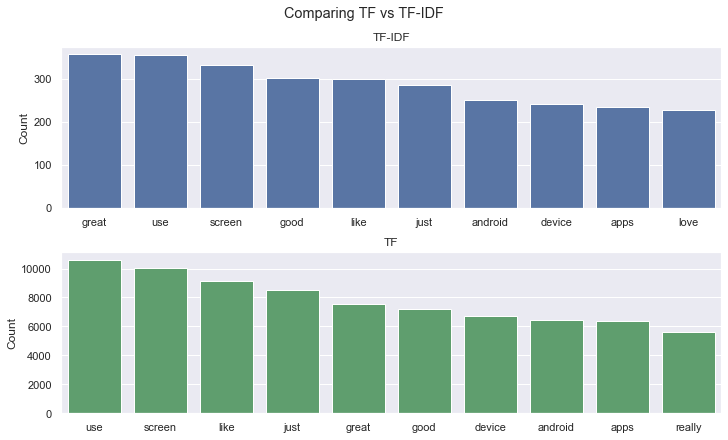

In [42]:
#create two subplots and define figsize
fig, ax = plt.subplots(2, figsize=(10,6),constrained_layout=True)

#Main title
fig.suptitle("Comparing TF vs TF-IDF")

#First ax title
ax[0].set_title("TF-IDF")
#plot frequency count of overall score
sns.barplot(ax=ax[0],x="Word",y="Count",data=tfidf_df.head(12).tail(10),color="b")
ax[0].set_xlabel("")

#Second ax title
ax[1].set_title("TF")
#plot frequency count of response score
sns.barplot(ax=ax[1],x="Word",y="Count",data=tf_df.head(12).tail(10),color="g")
ax[1].set_xlabel("")



### 2.2.3) TF-IDF analysis for positive sentiment <a class="anchor" id="part2.2.3"></a>

In [43]:
#Each item on the list is a review

df_pos=df_tab[df_tab["sentiment"]==1]

review_words_pos= [x.strip() for x in df_pos["reviewText"]]
review_words_pos[:5]

['The Nook Tablet, in both the 16gb version and 8 gb version, are the best color e-readers of 2012.  Both are bargains when purchased at the discounted price Barnes & Noble provides to its members.However, they are designed for reading...if you want a gaming tablet, a Skype video tablet, or need access to thousands of apps, you need an I-Pad.I have owned a "Brand X" color e-reader for about a year, but seldom use it for reading because it causes eye strain. I have a Nook Simple Touch e-reader that is wonderful for books, but its e-ink screen is black on white only, which does not work well for colorful magazines such as "Automobile" or "National Geographic".Barnes & Noble has an offer that enables its members to buy the Nook tablet for MUCH less than the price quoted by internet vendors, so I took advantage of their offer...plus the staff of my neighborhood Barnes & Noble were very helpful, and invited me to classes they provide to teach new owners the in\'s and out\'s of their new tab

In [44]:
#tfidf is receiving the sklearn method of tf-idf analysis; stop words in English; the analysis will consider only 1,000 words
tfidf_pos = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english')

# >>> vectorizer = TfidfVectorizer()
# >>> X = vectorizer.fit_transform(corpus)
# >>> print(vectorizer.get_feature_names())
# ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

#fit the tfidf algorithm with review_words 
tfidf_an_pos = tfidf_pos.fit(review_words_pos)
#transform to document-term matrix
corpus_tf_idf_pos = tfidf_an_pos.transform(review_words_pos) 

sum_words_idf_pos = corpus_tf_idf_pos.sum(axis=0)
words_freq_idf_pos = [(word, sum_words_idf_pos[0, idx]) for word, idx in tfidf_an_pos.vocabulary_.items()]

tfidf_df_pos=pd.DataFrame(words_freq_idf_pos,columns=["Word","Count"])
tfidf_df_pos=tfidf_df_pos.sort_values(by="Count",ascending=False)

tfidf_df_pos.head(10)

,Word,Count
1,tablet,511.039320
423,ipad,392.606103
177,great,302.845119
33,use,286.563542
42,screen,251.449204
153,good,242.850634
250,like,234.620735
236,just,216.538764
273,love,200.058846
195,android,195.705126


In [45]:
#intialise countvectoriser; stop words in English
cv_pos = CountVectorizer(analyzer='word', stop_words = 'english') 
# fit to review_words
tf_an_pos=cv_pos.fit_transform(review_words_pos)

#get the word names
sum_words_tf_pos=cv_pos.get_feature_names()
#term frequency of each word
count_words_tf_pos=tf_an_pos.toarray().sum(axis=0)

#transform both lists to dataframe
tf_df_pos=pd.DataFrame(list(zip(sum_words_tf_pos,count_words_tf_pos)),columns=["Word","Count"])
tf_df_pos=tf_df_pos.sort_values(by="Count",ascending=False)

tf_df_pos.head(10)

,Word,Count
25803,tablet,16384
14535,ipad,10856
28053,use,8423
23016,screen,7463
15780,like,7053
12412,great,6431
15017,just,6208
12191,good,5612
3024,android,5019
3328,apps,4944


Text(0.5, 0, '')

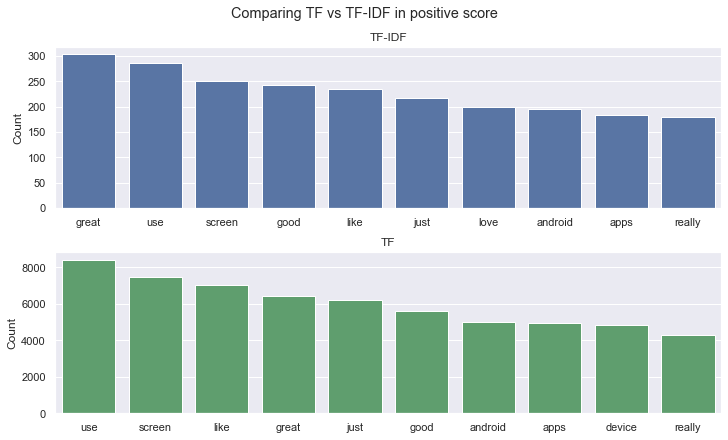

In [46]:
#create two subplots and define figsize
fig, ax = plt.subplots(2, figsize=(10,6),constrained_layout=True)

#Main title
fig.suptitle("Comparing TF vs TF-IDF in positive score")

#First ax title
ax[0].set_title("TF-IDF")
#plot frequency count of overall score
sns.barplot(ax=ax[0],x="Word",y="Count",data=tfidf_df_pos.head(12).tail(10),color="b")
ax[0].set_xlabel("")

#Second ax title
ax[1].set_title("TF")
#plot frequency count of response score
sns.barplot(ax=ax[1],x="Word",y="Count",data=tf_df_pos.head(12).tail(10),color="g")
ax[1].set_xlabel("")



### 2.2.4) TF-IDF analysis for negative sentiment  <a class="anchor" id="part2.2.4"></a>

In [47]:
#Each item on the list is a review

df_neg=df_tab[df_tab["sentiment"]==0]

review_words_neg= [x.strip() for x in df_neg["reviewText"]]
review_words_neg[:5]

['I saw this product on Amazon and thought "what a great deal" because this is a 16GB version of the same tablet that Barnes & Noble is selling for $250 dollars.It mostly works, and the screen is great for reading books.  I have had problems with the browser since 2 weeks of owning and the Apps have issues loading and playing some games.  If I could, I would return this product and just pay out the money for a brand new one.',
 "Have no idea why people love this thing so much, you can't load any applications unless they are from the Barnes & Noble store and you can't even download the free version of Angry Birds.Apparently Barnes & Noble is worse than Apple at remotely disabling Nooks they deemed rooted by end users. You have less control of this thing than you would your TV.The root kits are useless for this OS version 1.4.2 and the instructions to root / jailbreak it read worse than rocket instructions from annoying geeks !It is an overpriced Barnes & Noble franchise in your dumb lit

In [48]:
#tfidf is receiving the sklearn method of tf-idf analysis; stop words in English; the analysis will consider only 1,000 words
tfidf_neg = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = 'english')

#fit the tfidf algorithm with review_words 
tfidf_an_neg = tfidf_neg.fit(review_words_neg)
#transform to document-term matrix
corpus_tf_idf_neg = tfidf_an_neg.transform(review_words_neg) 

sum_words_idf_neg = corpus_tf_idf_neg.sum(axis=0)
words_freq_idf_neg = [(word, sum_words_idf_neg[0, idx]) for word, idx in tfidf_an_neg.vocabulary_.items()]

tfidf_df_neg=pd.DataFrame(words_freq_idf_neg,columns=["Word","Count"])
tfidf_df_neg=tfidf_df_neg.sort_values(by="Count",ascending=False)

tfidf_df_neg.head(10)

,Word,Count
8,tablet,148.644518
439,ipad,93.309346
15,screen,83.222301
28,just,72.173488
89,use,70.694742
210,like,66.889964
78,device,64.830354
921,asus,62.934226
91,good,61.970466
132,android,55.831260


In [49]:

#intialise countvectoriser; stop words in English
cv_neg = CountVectorizer(analyzer='word', stop_words = 'english') 
# fit to review_words
tf_an_neg=cv_neg.fit_transform(review_words_neg)

#get the word names
sum_words_tf_neg=cv_neg.get_feature_names()
#term frequency of each word
count_words_tf_neg=tf_an_neg.toarray().sum(axis=0)

#transform both lists to dataframe
tf_df_neg=pd.DataFrame(list(zip(sum_words_tf_neg,count_words_tf_neg)),columns=["Word","Count"])
tf_df_neg=tf_df_neg.sort_values(by="Count",ascending=False)

tf_df_neg.head(10)

,Word,Count
15080,tablet,5198
8408,ipad,2701
13362,screen,2578
8651,just,2316
16355,use,2191
9093,like,2118
4682,device,1880
7014,good,1619
15524,time,1528
1927,asus,1448


Text(0.5, 0, '')

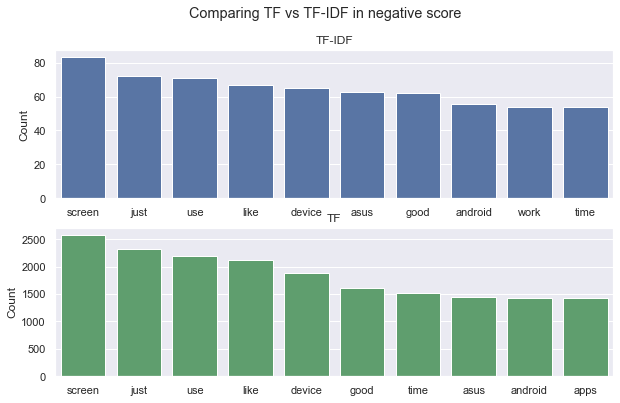

In [50]:
#create two subplots and define figsize
fig, ax = plt.subplots(2, figsize=(10,6))

#Main title
fig.suptitle("Comparing TF vs TF-IDF in negative score")

#First ax title
ax[0].set_title("TF-IDF")
#plot frequency count of overall score
sns.barplot(ax=ax[0],x="Word",y="Count",data=tfidf_df_neg.head(12).tail(10),color="b")
ax[0].set_xlabel("")

#Second ax title
ax[1].set_title("TF")
#plot frequency count of response score
sns.barplot(ax=ax[1],x="Word",y="Count",data=tf_df_neg.head(12).tail(10),color="g")
ax[1].set_xlabel("")

### 2.2.5) Using Lexical Score to Predict Product Rating  <a class="anchor" id="part2.2.5"></a>

In [51]:
# In this sesssion, the Lexical Score was used try to predict the rating that a user would give to a product. 
# This analysis was not successful because the Lexical Scores generated were not matching the real sentiment of the user.
# This could have happened because of ambiguous words that were used in the reviews, which ended up generating inaccurate
# lexical scores. Additionally, trying to predict many different categories (ratings from 1 to 5) may have 
# impacted the results.

#pip install vaderSentiment <--- run this line if you don't have vaderSentiment installed
import nltk
from nltk.classify import NaiveBayesClassifier
# nltk.download('subjectivity')
nltk.download('movie_reviews')
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.downloader.download('vader_lexicon')

# 1. Create a table with columns reviewText, overall
text_ratings = df_tab[['reviewText', 'overall']]
# text_ratings[text_ratings['reviewText'] == ''] # ---> 13 rows don't have a review text.
text_ratings = text_ratings[text_ratings['reviewText'] != ''] # reassigning the dataframe only with rows that have reviews.

# 2. Generate a lexical score for each reviewText and put it in a list
lexicalScoreList = []
sid = SentimentIntensityAnalyzer()
for doc in text_ratings['reviewText']:
    ss = sid.polarity_scores(doc)
    lexicalScoreList.append(ss['compound'])

# 3. Create a new column called lexicalScore
text_ratings['lexicalScore'] = lexicalScoreList



[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/gabrielamonteiro/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gabrielamonteiro/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [52]:
text_ratings

,reviewText,overall,lexicalScore
237,"The Nook Tablet, in both the 16gb version and ...",5.0,0.9990
238,"I saw this product on Amazon and thought ""what...",3.0,0.8910
239,Now I have like four different kendels and I a...,5.0,0.9300
240,"this is excellent tablet, excellent touch scre...",5.0,0.9459
241,"I love nooks. Kindle fire is OK, but nooks are...",5.0,0.4341
...,...,...,...
1688824,I spent a lot of time researching the right ta...,5.0,0.8977
1688825,Samsung's Tab S is a strong rival to the iPad ...,3.0,0.2846
1688826,I question every review over 3 Stars on the Ga...,1.0,0.9794
1688827,Boot up time about 30 seconds. Quick and snapp...,5.0,-0.3595


In [151]:
X = text_ratings['lexicalScore'].values.reshape(-1,1)
y = text_ratings['overall'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [152]:
from sklearn.linear_model import LinearRegression
my_model = LinearRegression()
my_model.fit(X_train, y_train)

print(f"The accuracy score of the model is {my_model.score(X_test, y_test)}")

The accuracy score of the model is 0.20895098364991227


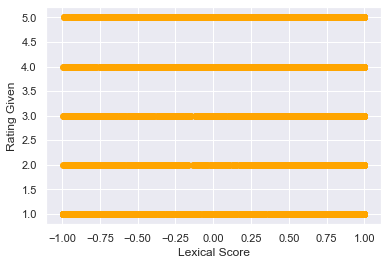

In [53]:
# The accuracy of the model is very low.
# By the plot it is possible to see that it doesn't matter what rating a user gave to a product, when their text 
# review is analysed, the lexical score generated seems to not be aligned with the rating given. There is a high 
# probability that the reviewed text will receive any of the lexical scores. Why has it happened? 

# Plot
plt.scatter(text_ratings['lexicalScore'], text_ratings['overall'], color='orange')
plt.ylabel('Rating Given')
plt.xlabel('Lexical Score')
plt.show()

In [54]:
# The generated lexical scores was separated into bins to visualise the distribution of ratings inside each bin.

pd.DataFrame(text_ratings['lexicalScore'].value_counts(bins=5)).reset_index().sort_values(by='index',ascending=False)


,index,lexicalScore
0,"(0.601, 1.0]",9270
1,"(0.202, 0.601]",1106
3,"(-0.197, 0.202]",600
4,"(-0.596, -0.197]",529
2,"(-0.997, -0.596]",758


In [55]:
# A function was created that would take the rating (1 to 5) as argument and returns a list with the count of 
# lexical scores within the range defined in the bins:

# BINS
# above -0.997
# between -0.596, -0.197
# between -0.197, 0.202
# between 0.202, 0.601
# above 0.601

def lexicon_score_per_rating(rating):
    '''takes a rating as argument and returns a list with number of lexicon scores received within a given scores range.'''
    scores_range_list = (0.601, 0.202,-0.197,-0.596,-0.997)
    generated_list = []
    df = text_ratings.copy()

    for score in scores_range_list:
        count = df[(df['lexicalScore'] >= score) & (df['overall']==rating)].shape[0]
        generated_list.append(count)
        df.drop(df[(df['lexicalScore'] >= score) & (df['overall']==rating)].index, inplace=True)
    return generated_list[::-1]


rat_5 = lexicon_score_per_rating(5)
rat_4 = lexicon_score_per_rating(4)
rat_3 = lexicon_score_per_rating(3)
rat_2 = lexicon_score_per_rating(2)
rat_1 = lexicon_score_per_rating(1)

print(rat_5) 
print(rat_4)
print(rat_3)
print(rat_3)
print(rat_2)
print(rat_1)



[82, 129, 217, 548, 5747]
[87, 87, 117, 212, 2175]
[123, 91, 104, 148, 689]
[123, 91, 104, 148, 689]
[170, 96, 66, 93, 357]
[296, 126, 96, 105, 302]


Text(0.5, 1.0, 'Lexical Scores per Ratings')

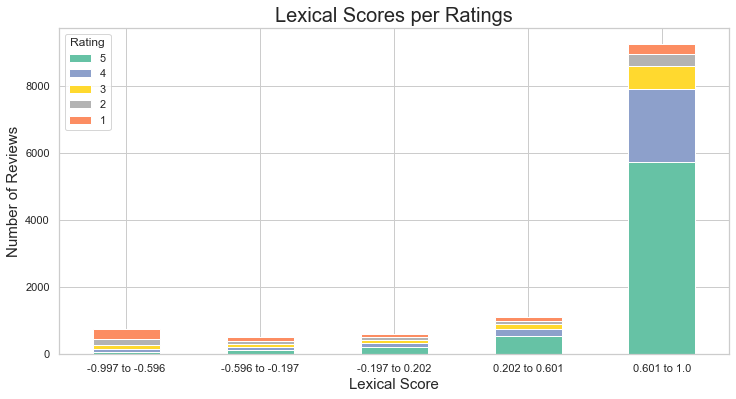

In [56]:
# As it is possible to see from the plot, the bin with the highest lexical score (above 0.601) includes a great number of 
# reviews with rating 5. On the other hand, the bin with the lowest lexical score (below -0.596) has a great 
# number of reviews with ratings 1. 

# So, it is possible to conclude that the lexical scores aligns well with extreme ratings, but can not accurately 
# capture intermediate ratings.



df = pd.DataFrame(columns=['Rating',
                           '-0.997 to -0.596', 
                           '-0.596 to -0.197',
                           '-0.197 to 0.202', 
                           '0.202 to 0.601',
                           '0.601 to 1.0'], 
                   data=[['5',82, 129, 217, 548, 5747],
                        ['4',87, 87, 117, 212, 2175],
                        ['3',123, 91, 104, 148, 689],
                        ['2',170, 96, 66, 93, 357],
                        ['1',296, 126, 96, 105, 302]])

sns.set(style="whitegrid")

from matplotlib.colors import ListedColormap

df.set_index('Rating').T.plot(kind='bar', stacked=True,colormap=ListedColormap(sns.color_palette("Set2", 10)), 
                                                                                                figsize=(12,6))
plt.xticks(rotation=0)
plt.xlabel('Lexical Score', size=15)
plt.ylabel('Number of Reviews', size=15)
plt.title('Lexical Scores per Ratings', size=20)



In [57]:
# To understand what happened, it was necessary to check the reviews of the lexical scores that were not aligned with 
# the rating given by a certain user.

# From the table below, it's possible to see that one user gave 5 stars, but their lexical score (compound) was -0.3595
# Another user rated a product as 1, but received 0.9794 as a lexical score.
# This situation might have happened with many other users.

text_ratings.tail()

,reviewText,overall,lexicalScore
1688824,I spent a lot of time researching the right ta...,5.0,0.8977
1688825,Samsung's Tab S is a strong rival to the iPad ...,3.0,0.2846
1688826,I question every review over 3 Stars on the Ga...,1.0,0.9794
1688827,Boot up time about 30 seconds. Quick and snapp...,5.0,-0.3595
1688828,"With the Samsung Galaxy Tab S 10.5, Samsung fi...",4.0,0.9712


In [58]:
text_ratings.loc[1688827 , 'reviewText']

sentiment = SentimentIntensityAnalyzer()
sentiment.polarity_scores('''Boot up time about 30 seconds. Quick and snappy. Incredible looking screen! 
                          I bought a keyboard and mouse to go along with it. This is big enough for me to 
                          replace a laptop and other much slower systems. I replaced touchwiz with Nova 
                          Launcher and can place all my icons on one home screen. Some difficulties in 
                          connecting an external hd.''')

# OBS: This user gave a rating of 5 stars to this product, however, his compound is -0.3595
# This might have happened because he used words such as "replace", "slower", "difficulties".



{'neg': 0.043, 'neu': 0.957, 'pos': 0.0, 'compound': -0.3595}

In [59]:
text_ratings.loc[1688826, 'reviewText']

sentiment.polarity_scores('''I question every review over 3 Stars on the Galaxy Tab S as either premature or 
paid reviews because my experience can no way be isolated. I had my Tab S for 9 days and in that time I 
experienced why this tablet was years away from even a slight comparison to the iPad. To be clear, I am NOT 
a fan of Apple products.First, the screen is beautiful. The colors on images and videos pop right out. It's 
an eye catching experience just looking at the technology of an Amoled screen. Size and weight are also perfect 
but that is where the positive attributes end.First, I travel quite a bit and this tablet was for movies on the 
plane, reading books and magazines and catching up on email. You cannot access or play your Amazon Prime library 
as Amazon only supports Amazon tablets for downloading and playing movies. At least on the iPad you can play your 
Prime movies. Not on the Tab S, you are just dead in the water. You can however access Flickster movies and save 
them to Dropbox, which works well.After viewing movies, I noticed images and videos were blurred from frame to frame 
and the darks were very distorted. I tried changing the display setting but nothing worked. When reading web pages 
or books and magazines on the first few pages would be in view and others were blurry. Nothing seemed to correct 
this either. I brought my Tab S into Best Buy they were aware of this issue and had seen it on a few returns. 
So in other words, nothing you can do to correct it.The camera is great and pics are crisp and clear. For me, 
a camera on a tablet is a bit useless but I was impressed with the clarity of images.Now to the big issue which 
caused me to return my Galaxy Tab S. Latency and Lag. If you are clicking on an app, using the back button or 
just navigating from task to task, you will find yourself waiting for the tablet to catch up to you. For has 
powerful as this thing is in terms of Specs, it is slow and locks up quite a bit. It is frustrating because it 
happens all the time and is not isolated from one area to another. This was the back breaker for me. Not to mention 
no access to Outlook for email when the Samsung email client will not sync Outlook sub-folders and is outdated. 
People told me to download 3rd party apps to make email work. That makes no sense. It works on the iPad, Surface, 
Google and Asus tablets without a 3rd party app so why is Samsung so far behind in technology?I almost forgot, 
Battery life is 6 to 7 hours in real time use. Where they are coming up with 9 to 10 is amazing.All and all, the 
Galaxy Tab S is a huge disappointment. Sure the screen is nice but over a short period of time you start to realize 
that everything else is below par. I would not recommend this tablet to anyone especially with the huge price point.''')

# OBS: this user gave 1 star rating, but the compound shows 0.9794.
# This could be explained because the user was complimenting another product, which he believes to be better than 
# the one that he bought.

{'neg': 0.082, 'neu': 0.792, 'pos': 0.125, 'compound': 0.9794}

## 2.3) Time Series Analysis  <a class="anchor" id="part2.3"></a>

### 2.3.1) Trend and Seasonality  <a class="anchor" id="part2.3.1"></a>

In [60]:
#source: https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
df_tab['timeFormat'].min(), df_tab['timeFormat'].max()

(Timestamp('2010-04-04 00:00:00'), Timestamp('2014-07-23 00:00:00'))

In [61]:
df_tab_ordered = df_tab.sort_values('timeFormat')
df_tab_ordered.isnull().sum()

reviewerID         0
asin               0
reviewText         0
overall            0
summary            0
description        0
categories         0
title              0
price              0
salesRank       7967
related            0
brand              0
timeFormat         0
sentiment          0
helpfulRatio    3547
month_year         0
hour               0
DayofWeek          0
day_month          0
dtype: int64

In [62]:
df_tab_ordered = df_tab_ordered.groupby('timeFormat')['price'].sum().reset_index()
df_tab_ordered = df_tab_ordered.set_index('timeFormat')
df_tab_ordered.index

DatetimeIndex(['2010-04-04', '2010-04-05', '2010-04-08', '2010-04-10',
               '2010-04-11', '2010-04-14', '2010-04-15', '2010-04-16',
               '2010-04-18', '2010-04-21',
               ...
               '2014-07-14', '2014-07-15', '2014-07-16', '2014-07-17',
               '2014-07-18', '2014-07-19', '2014-07-20', '2014-07-21',
               '2014-07-22', '2014-07-23'],
              dtype='datetime64[ns]', name='timeFormat', length=1439, freq=None)

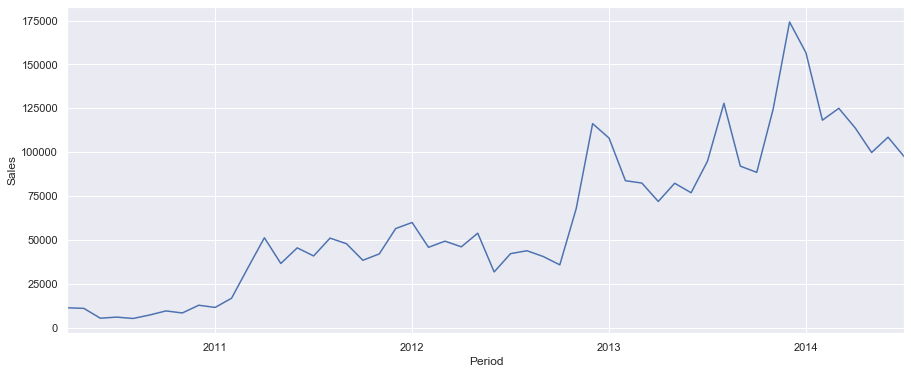

In [254]:
# It is assumed that the sum of the prices of the reviewed products in a certain month represents the
# total sales in that month. 
y = df_tab_ordered['price'].resample('MS').sum()

# in the resample function the argument 'MS' was used for the parameter 'role'. 
# in the resample function, 'MS' refers to month start frequency, which was the timestamp used for this analysis.

y.plot(figsize=(15, 6))
plt.xlabel('Period')
plt.ylabel('Sales')
plt.show()

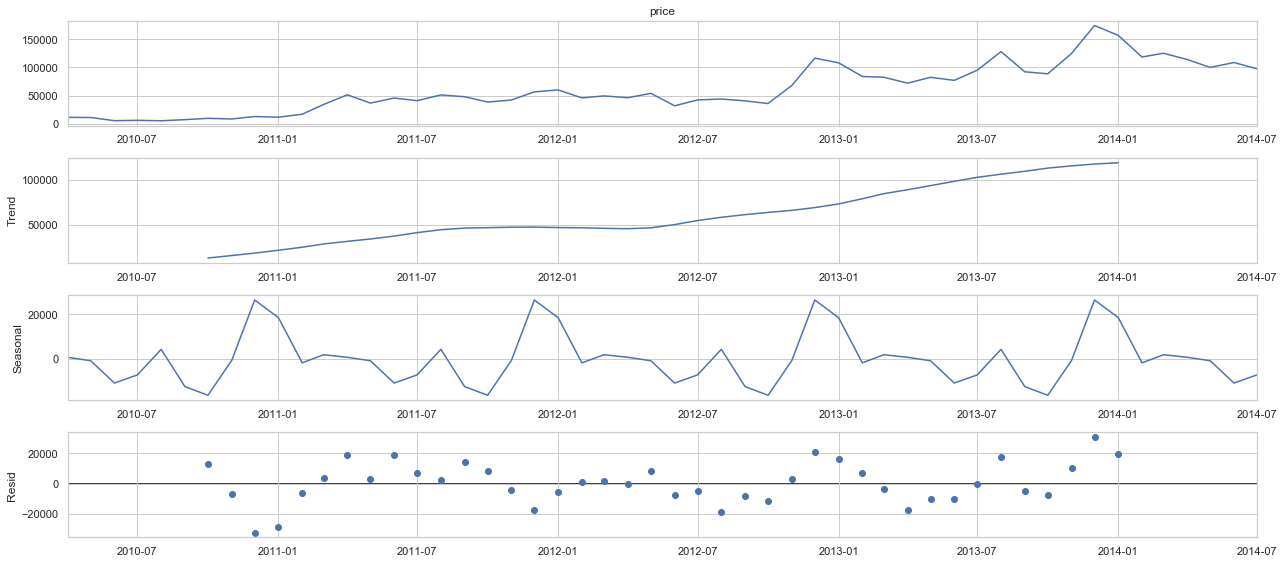

In [64]:
'''The plot shows that the tablet sales have an overall upward trend. It also suggests a seasonality pattern, mostly 
associated with the months that Apple has new releases. This pattern started after Apple launched its first iPad in 
April 2010. As seen from the plot, there is the first peak in tablet sales during this time. An even more 
significant peak happens in March 2011, when Apple launches iPad 2. In the following year, tablet sales are unstable 
and experiences a slight decrease in purchases. However, in November 2013 we see a new significant 
peak, most likely associated with Apple releasing 2 new iPads (iPad Air and iPad Mini 2). 

From this plot it is possible to infer that Apple releases play a tremendous impact in the overall sales of tablets.'''

from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8

# Because the function seasonal_decompose() does not handle missing values, we will take data starting from 2009.
decomposition = sm.tsa.seasonal_decompose(y['2010':], model='additive')
fig = decomposition.plot()
plt.show()

### 2.3.2) Forecasting  <a class="anchor" id="part2.3.2"></a>

In [65]:
# create a copy of the dataframe, and add columns for month and year
df_tablets = df_tab[['timeFormat', 'price']].set_index('timeFormat')
df_tablets['month'] = [i.month for i in df_tablets.index]
df_tablets['year'] = [i.year for i in df_tablets.index]
# group by month and year, get the sum
df_tablets = df_tablets.groupby(['month', 'year']).sum()
df_tablets = df_tablets.unstack(level=0)
df_tablets.dropna(inplace=True)
df_tablets

price                                                              \
month         1         2         3         4         5         6         7    
year                                                                           
2011    11564.36  16817.79  34194.51  51269.62  36607.29  45499.68  40898.34   
2012    59955.23  45814.90  49331.29  46097.40  53863.21  31790.48  42210.43   
2013   108050.48  83757.25  82421.24  71943.94  82312.08  76907.79  94915.71   

                                                            
month         8         9         10         11         12  
year                                                        
2011    51049.29  47870.28  38433.64   42058.02   56515.83  
2012    43861.50  40540.05  35823.50   67885.55  116279.09  
2013   127874.90  92067.01  88512.35  124549.86  174199.89

In [66]:
# create a copy of the dataframe, and add columns for month and year
df_reviews_year = df_tab[['timeFormat', 'price']].set_index('timeFormat')
df_reviews_year['month'] = [i.month for i in df_reviews_year.index]
df_reviews_year['year'] = [i.year for i in df_reviews_year.index]
# group by month and year, get the count
df_reviews_year = df_reviews_year.groupby(['month', 'year']).count()

df_reviews_year = df_reviews_year.unstack(level=0)
#Dropping null values for the months
df_reviews_year.dropna(inplace=True)

df_reviews_year

price                                                                 \
month     1      2      3      4      5      6      7      8      9      10   
year                                                                          
2011    39.0   50.0  116.0  179.0  121.0  147.0  137.0  171.0  174.0  131.0   
2012   213.0  154.0  162.0  158.0  192.0  124.0  156.0  175.0  165.0  142.0   
2013   430.0  327.0  318.0  284.0  331.0  302.0  383.0  545.0  400.0  366.0   

                     
month     11     12  
year                 
2011   148.0  215.0  
2012   261.0  445.0  
2013   504.0  722.0

In [67]:
df_reviews_year.sum(axis=1)

year
2011    1628.0
2012    2347.0
2013    4912.0
dtype: float64

In [68]:
df_tablets


price                                                              \
month         1         2         3         4         5         6         7    
year                                                                           
2011    11564.36  16817.79  34194.51  51269.62  36607.29  45499.68  40898.34   
2012    59955.23  45814.90  49331.29  46097.40  53863.21  31790.48  42210.43   
2013   108050.48  83757.25  82421.24  71943.94  82312.08  76907.79  94915.71   

                                                            
month         8         9         10         11         12  
year                                                        
2011    51049.29  47870.28  38433.64   42058.02   56515.83  
2012    43861.50  40540.05  35823.50   67885.55  116279.09  
2013   127874.90  92067.01  88512.35  124549.86  174199.89

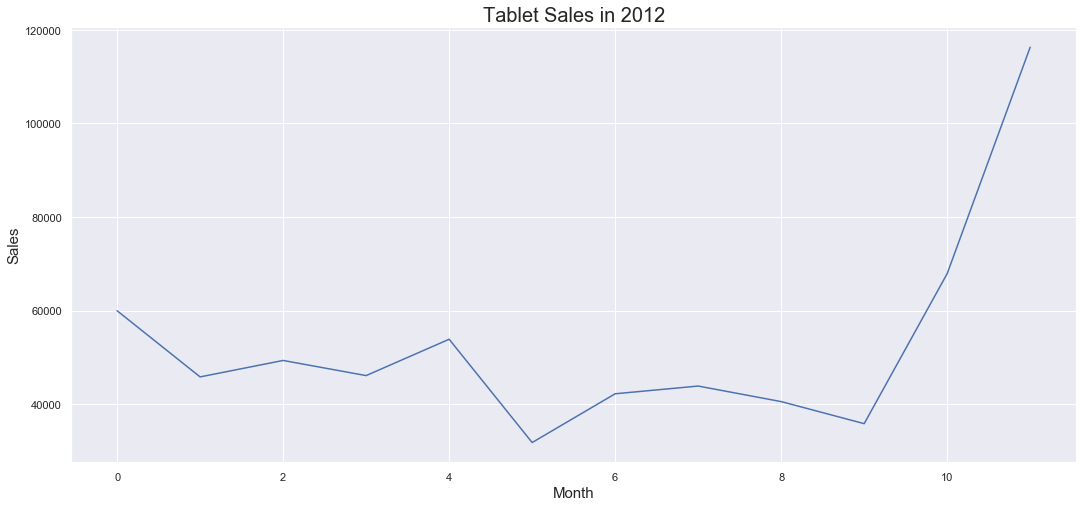

In [204]:
#Grabbing the values of the YEAR 2012
list_sales = df_tablets.iloc[-2].values[:]

#Creating a list with the months
#list_months = ['Jan', 'Fev', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
list_months = range(1,13)

#Zipping both lists and creating a dataframe
list_of_tuples = list(zip(list_months, list_sales)) 
df_2012 = pd.DataFrame(list_of_tuples, columns = ['Period', 'Sales']) 

plt.plot(df_2012['Sales'])
plt.title('Tablet Sales in 2012', size=20)
plt.xlabel('Month', size=15)
plt.ylabel('Sales', size=15)
plt.show()

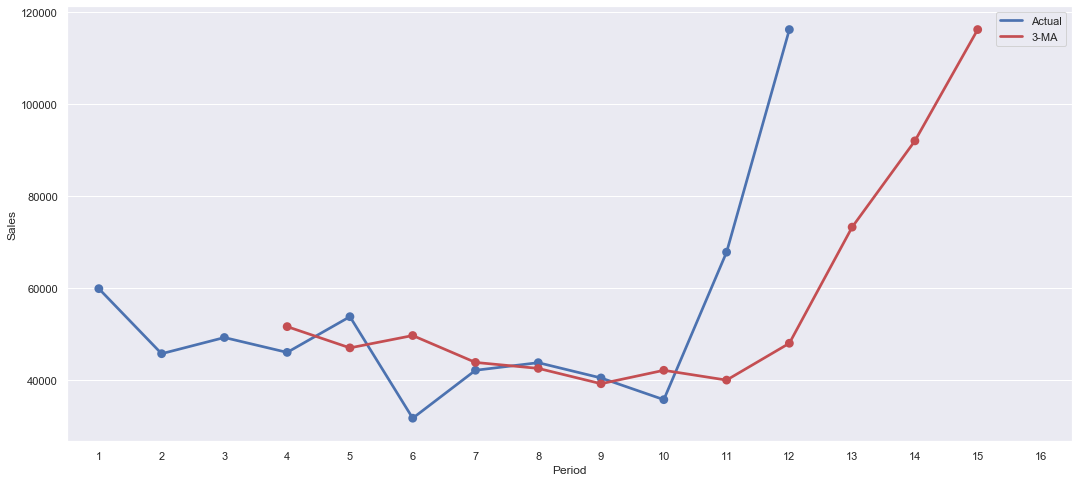

In [205]:
# Using moving average
def moving_average(df, k, to_period):
    moving_average_df = pd.DataFrame(columns=['Period','Sales'])
    num_df = len(df)
    for m in range(0, to_period):
        if m < k:
            sale_predict = float('nan')
        else:
            history = df['Sales'][m-k:m]
            sale_predict = history.mean()
        moving_average_df.loc[m] = [m+1, sale_predict]
    
    moving_average_df['Period'] = moving_average_df['Period'].astype(int)
    return moving_average_df

f, ax = plt.subplots(1, 1)
ma_df = moving_average(df_2012, 3, 16)
sns.pointplot(x='Period', y='Sales', data=df_2012, color='b')
sns.pointplot(x='Period', y='Sales', data=ma_df, color='r')
ax.legend(handles=ax.lines[::len(df_2012)+1], labels=["Actual", "3-MA"])
plt.show()

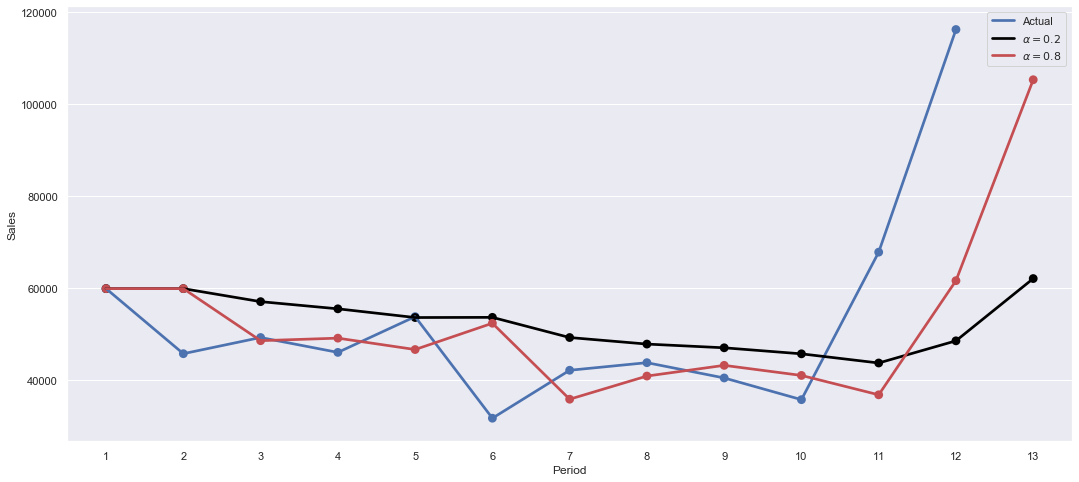

In [234]:
def exponential_smoothing(df, alpha):
    es_df = pd.DataFrame(columns=['Period','Sales'])
    es_df.loc[0] = [1, df['Sales'][0]]
    num_df = len(df)
    for m in range(0, num_df):
        sale_predict = alpha * df['Sales'][m] + (1-alpha) * es_df['Sales'][m]
        es_df.loc[m+1] = [m+2, sale_predict]
        
    es_df['Period'] = es_df['Period'].astype(int)
    return es_df

f, ax = plt.subplots(1, 1)
es_df_02 = exponential_smoothing(df_2012, 0.2)
es_df_08 = exponential_smoothing(df_2012, 0.8)
sns.pointplot(ax=ax, x='Period', y='Sales', data=df_2012, color='b')
sns.pointplot(ax=ax, x='Period', y='Sales', data=es_df_02, color='black')
sns.pointplot(ax=ax, x='Period', y='Sales', data=es_df_08, color='r')

ax.legend(handles=ax.lines[::len(df_2012)+2], labels=["Actual", r'$\alpha=0.2$', r"$\alpha=0.8$"])
plt.show()

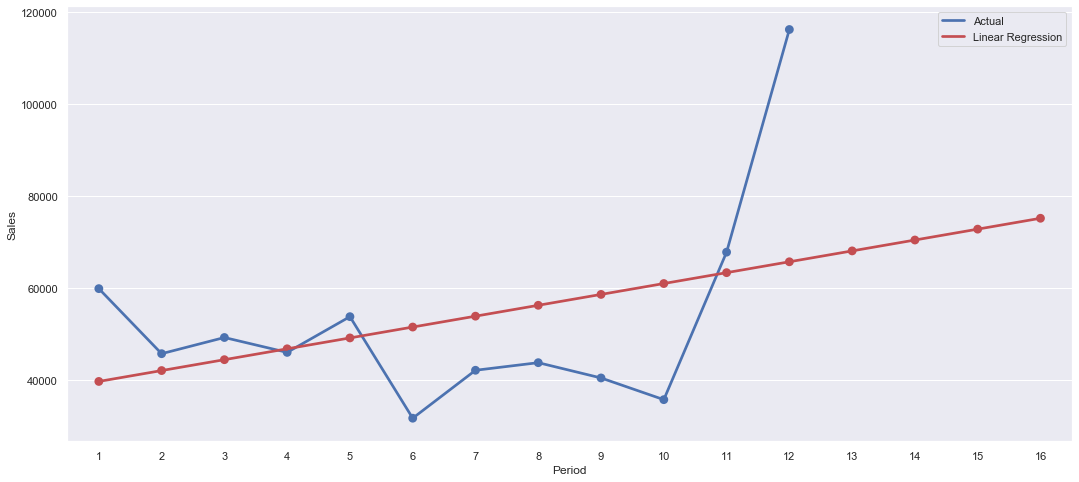

In [219]:
def linear_regression(df):
    linear_df = df.copy()
    linear_df['PeriodSales'] = linear_df['Period'] * linear_df['Sales'] 
    linear_df['Period_2'] = linear_df['Period'] * linear_df['Period']
    linear_df['Sales_2'] = linear_df['Sales'] * linear_df['Sales']
    linear_sum = linear_df.sum()
    linear_mean = linear_df.mean()
    
    b = (linear_sum['PeriodSales'] - len(df) * linear_mean['Period'] * linear_mean['Sales']) \
        / (linear_sum['Period_2']- len(df) * linear_mean['Period'] * linear_mean['Period'])
    a = linear_mean['Sales'] - b * linear_mean['Period']
    return a,b


a,b = linear_regression(df_2012)
linear_df = pd.DataFrame(columns=['Period','Sales'])
for m in range(1, 17):
    sale = a + b * m
    linear_df.loc[m-1] = [m,sale]
linear_df['Period'] = linear_df['Period'].astype(int)

f, ax = plt.subplots(1, 1)
sns.pointplot(ax=ax, x='Period', y='Sales', data=df_2012, color='b')
sns.pointplot(ax=ax, x='Period', y='Sales', data=linear_df, color='r')

ax.legend(handles=ax.lines[::len(df_2012)+2], labels=["Actual", "Linear Regression"])
plt.show()

/Users/gabrielamonteiro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RankWarning: Polyfit may be poorly conditioned


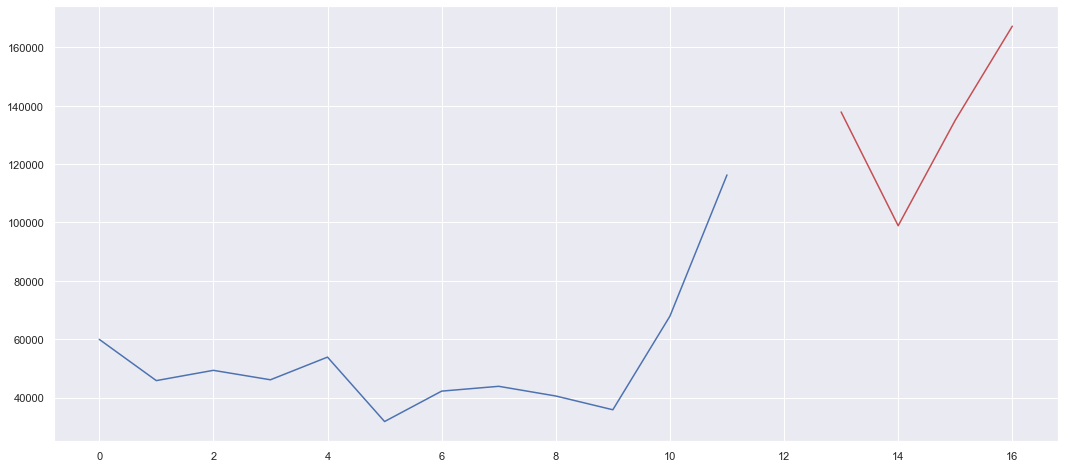

In [208]:
#season function
def get_season(row):
    if row['Period'] >= 5 and row['Period'] <= 8:
        return 'II'
    elif row['Period'] >= 9 and row['Period'] <= 12:
        return 'III'
    else:
        return 'I'
def get_seq(row):
    return row['Period']%4 and row['Period']%4 or 4

def predict_with_seasonality(df, months):
    new_df = df.copy()
    new_df['Season'] = new_df.apply(get_season, axis=1)
    new_df['Seq'] = new_df.apply(get_seq, axis=1)
    
    season_df = pd.DataFrame((new_df.pivot('Seq','Season')['Sales']).to_records())
    season_df.index = season_df['Seq']
    season_df = season_df.drop(['Seq'], axis=1)
    
    avg_df = season_df.apply(np.mean)
    
    seasonal_index_df = pd.DataFrame(columns=['I','II','III'])
    seasonal_index_df['I'] = season_df['I']/avg_df['I']
    seasonal_index_df['II'] = season_df['II']/avg_df['II']
    seasonal_index_df['III'] = season_df['III']/avg_df['III']
    seasonal_index_df['Avg'] = seasonal_index_df.mean(axis=1)
    
    season = np.array([1,2,3])
    avg_arr = np.array([avg_df['I'], avg_df['II'], avg_df['III']])
    fit = np.polyfit(season, avg_arr, 3)
    poly = np.poly1d(fit)
    average_predict = poly(4)
    forecast_df = pd.DataFrame(columns=['Period','Sales'])
    
    forecast_df['Sales'] = seasonal_index_df['Avg']*average_predict
    forecast_df['Period'] = months
#     forecast_df.index = forecast_df['Period']
    forecast_df.index = np.array(months) - 1
    return forecast_df

season_df = predict_with_seasonality(df_2012, [13,14,15,16])

f, ax = plt.subplots(1, 1)
plt.plot(df_2012['Sales'], c='b')
plt.plot(season_df['Period'], season_df['Sales'], c='r')
plt.show()

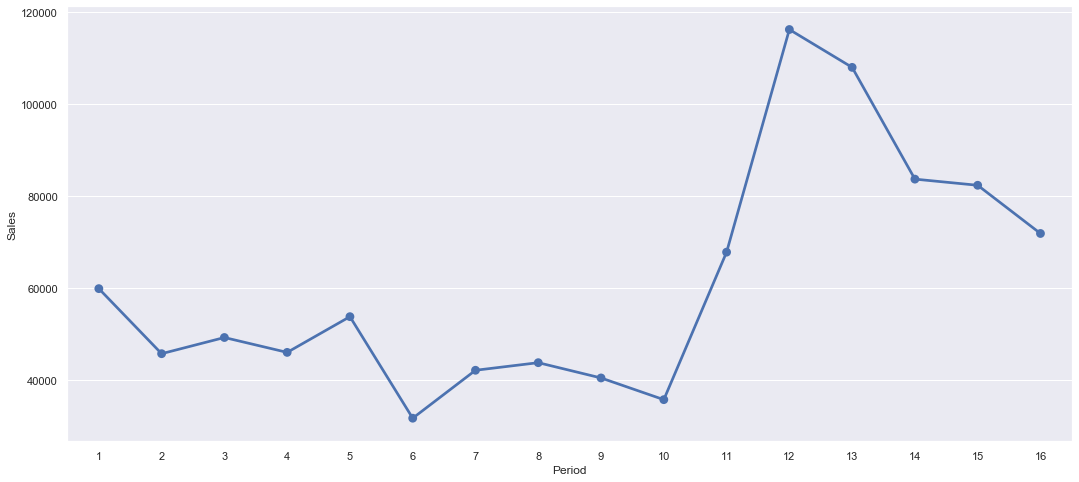

In [217]:
## EVALUATION
list_sales_2 = df_tablets.iloc[-1].values[:4]
list_months_2 = range(13,17)
list_of_tuples_2 = list(zip(list_months_2, list_sales_2))
df_2013 = pd.DataFrame(list_of_tuples_2, columns = ['Period', 'Sales']) 
eval_df = pd.concat([df_2012, df_2013], ignore_index=True)
sns.pointplot(x='Period', y='Sales', data=eval_df, color='b')

In [220]:
# Calculating the Mean Absolute Deviation (MAD)
# Measures the total error in a forecast without regard to sign.
# Higher MAD implies worse performance

# For each method above, it is calculated the MAD, by subtracting the predicted results for months 13 to 16 given 
# by each method, from the actual values.

# From the results, it is possible to conclude that the most accurate forecasting method is the Exponential Smoothing
# with alpha = 0.8.

MAD = np.absolute(eval_df['Sales'][12:16] - moving_average(eval_df, 3, 16)['Sales'][12:16]).mean()
print("MAD of {0}: {1}".format("3-MA", MAD))
MAD = np.absolute(eval_df['Sales'][12:16] - exponential_smoothing(eval_df, 0.2)['Sales'][12:16]).mean()
print("MAD of {0}: {1}".format("Exponential smoothing with alpha=0.2", MAD))
MAD = np.absolute(eval_df['Sales'][12:16] - exponential_smoothing(eval_df, 0.8)['Sales'][12:16]).mean()
print("MAD of {0}: {1}".format("Exponential smoothing with alpha=0.8", MAD))
MAD = np.absolute(eval_df['Sales'][12:16] - linear_df['Sales'][12:16]).mean()
print("MAD of {0}: {1}".format("Linear Regression", MAD))
MAD = np.absolute(eval_df['Sales'][12:16] - season_df['Sales'][0:4]).mean()
print("MAD of {0}: {1}".format("Seasonality Method", MAD))

MAD of 3-MA: 22027.243333333576
MAD of Exponential smoothing with alpha=0.2: 17634.142799997233
MAD of Exponential smoothing with alpha=0.8: 11056.836581531104
MAD of Linear Regression: 16492.490530303316
MAD of Seasonality Method: 48217.985079197075


### 2.3.3) Reviews by Month  <a class="anchor" id="part2.3.3"></a>

(<Figure size 900x612 with 6 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fce917f4d10>,
       dtype=object))

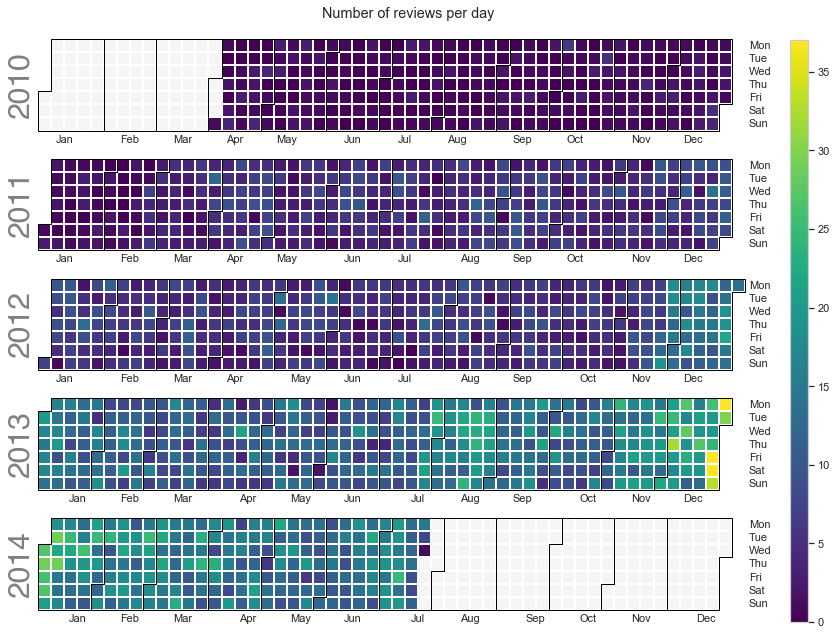

In [74]:
'''The number of reviews for Tablets have increased during the years and it is notable that during Christmas and New 
Year Eve, the number of reviews is significant. This is most likely due to purchasing patterns in this time of the year.'''
import calplot

df_tab_copy = df_tab.copy()
df_tab_copy=df_tab_copy[df_tab_copy["timeFormat"]>'2010-04-01']
df_tab_copy.set_index('timeFormat', inplace=True)
df_tab_copy.dropna()

title = 'Number of reviews per day'
calplot.calplot(df_tab_copy['reviewerID'], how='count', suptitle = title, linewidth=1, edgecolor = 'black')

# source: https://github.com/tomkwok/calplot

### 2.3.4) Reviews by Day of the Week  <a class="anchor" id="part2.3.4"></a>

In [ ]:
df_tab.head()

In [76]:
### Average Daily Reviews Count by Day of the Week

# A list with our preferred day of the week order
dayofweek_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Group reviews by day of the week count and order correctly(Mon-Sun) with DayofWeek as ordered index
dayofweek_count = df_tab.groupby(df_tab['DayofWeek']).count().reindex(dayofweek_order) 
dayofweek_count 



,reviewerID,asin,reviewText,overall,summary,description,categories,title,price,salesRank,related,brand,timeFormat,sentiment,helpfulRatio,month_year,hour,day_month
DayofWeek,,,,,,,,,,,,,,,,,,
Monday,1787,1787,1787,1787,1787,1787,1787,1787,1787,643,1787,1787,1787,1787,1237,1787,1787,1787
Tuesday,1831,1831,1831,1831,1831,1831,1831,1831,1831,619,1831,1831,1831,1831,1282,1831,1831,1831
Wednesday,1835,1835,1835,1835,1835,1835,1835,1835,1835,627,1835,1835,1835,1835,1299,1835,1835,1835
Thursday,1871,1871,1871,1871,1871,1871,1871,1871,1871,645,1871,1871,1871,1871,1319,1871,1871,1871
Friday,1757,1757,1757,1757,1757,1757,1757,1757,1757,620,1757,1757,1757,1757,1276,1757,1757,1757
Saturday,1616,1616,1616,1616,1616,1616,1616,1616,1616,574,1616,1616,1616,1616,1182,1616,1616,1616
Sunday,1579,1579,1579,1579,1579,1579,1579,1579,1579,581,1579,1579,1579,1579,1134,1579,1579,1579


In [77]:
# New dataframe with reviewerID and day of week as index
DayOfWeekGroupBy = pd.DataFrame(dayofweek_count['reviewerID'])
DayOfWeekGroupBy

,reviewerID
DayofWeek,
Monday,1787
Tuesday,1831
Wednesday,1835
Thursday,1871
Friday,1757
Saturday,1616
Sunday,1579


In [78]:
# New column for count how many unique dates per day of week
# Groupby DayofWeek and count unique Dates aka unique dates per DayofWeek (example: 241 mondays in the whole dataset)
DayOfWeekGroupBy['DayofWeekCount'] = df_tab.groupby('DayofWeek')['timeFormat'].nunique()
DayOfWeekGroupBy.head(7)

,reviewerID,DayofWeekCount
DayofWeek,,
Monday,1787,207
Tuesday,1831,205
Wednesday,1835,205
Thursday,1871,202
Friday,1757,206
Saturday,1616,203
Sunday,1579,211


In [79]:
# Getting the average reviews per day of the week.
DayOfWeekGroupBy['AverageDailyReviews'] = round(DayOfWeekGroupBy['reviewerID'] / DayOfWeekGroupBy['DayofWeekCount'], 2)
DayOfWeekGroupBy

,reviewerID,DayofWeekCount,AverageDailyReviews
DayofWeek,,,
Monday,1787,207,8.63
Tuesday,1831,205,8.93
Wednesday,1835,205,8.95
Thursday,1871,202,9.26
Friday,1757,206,8.53
Saturday,1616,203,7.96
Sunday,1579,211,7.48


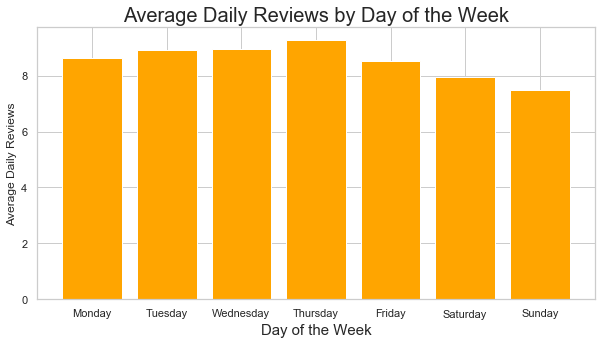

'From the plot we can see that people tend to write more reviews on Thursday. Weekends have the lowest number of reviews..'

In [80]:
# Average Daily Reviews by Day of the Week
# y axis 
y = DayOfWeekGroupBy['AverageDailyReviews']

# x axis is Day of the Week(our index that has been ordered Mon - Sun)
x = DayOfWeekGroupBy['reviewerID'].index

fig, ax = plt.subplots(figsize=(10,5))

ax.set_title("Average Daily Reviews by Day of the Week", size=20)
ax.set_xlabel('Day of the Week', size=15)
ax.set_ylabel('Average Daily Reviews', size=12)

plt.bar(x, y, color='orange')
plt.show()

'''From the plot we can see that people tend to write more reviews on Thursday. Weekends have the lowest number of reviews.'''

In [81]:
'''This is an alternative interactive visualisation (using Nightingale Rose chart) to show the number of reviews 
by day of the week.'''

from pyecharts.charts import Pie
from pyecharts import options as opts
# pip install pyecharts -U --> run this line if you don't have the pyechart module installed


c = DayOfWeekGroupBy['reviewerID'].index.values.tolist() #Day of the Week(our index that has been ordered Mon - Sun)
d = DayOfWeekGroupBy['AverageDailyReviews'].values.tolist() # Average Daily Reviews by Day of the Week

#create the color_series for the rosechart
color_series = ['#802200','#B33000','#FF4500','#FAA327','#9ECB3C', 
                '#6DBC49','#37B44E']
# rosechart = Pie(init_opts=opts.InitOpts(width='1350px', height='750px'))
rosechart = Pie(init_opts=opts.InitOpts(width='1012px', height='562px'))
# set the color
rosechart.set_colors(color_series)
# add the data to the rosechart
rosechart.add("", [list(z) for z in zip(c, d)],
        radius=["20%", "95%"],  # 20% inside radius，95% ourside radius
        center=["30%", "60%"],   # center of the chart
        rosetype="area")
# set the global options for the chart
rosechart.set_global_opts(title_opts=opts.TitleOpts(title='Nightingale Rose Chart',
                                                    subtitle="Average Number of Reviews per Day of the Week"),
                                                    legend_opts=opts.LegendOpts(is_show=False),
                                                    toolbox_opts=opts.ToolboxOpts())
# set the series options
rosechart.set_series_opts(label_opts=opts.LabelOpts(is_show=True, position="inside", 
                                                    font_size=12,formatter="{b}: {c}",
                                                    font_style="italic",font_weight="bold", 
                                                    font_family="Century"))

'''From the plot we can see that reviews are very homogeneous during the week, with a slight less chance of
people making reviews during the weekend.'''

rosechart.render_notebook()


# Source: https://python.plainenglish.io/make-a-beautiful-bar-chart-in-just-few-lines-in-python-5625ebc71c49

### 2.3.5) Brand Sales Rank by Period - Interactive Plot  <a class="anchor" id="part2.3.5"></a>

In [102]:
#pip install altair  <--- run this line if you don't have altair installed
import altair as alt

In [103]:
sales = df_tab.loc[df_tab['salesRank'].isna() != True]

In [104]:
# the salesRank column has a dictionary and we want to grab only the number of the dictionary.
list1 = []
for dic in sales['salesRank']:
    if len(dic.values()) == 0:
        list1.append(0)
    else:
        list1.append(list(dic.values())[0])

sales['newSalesRank'] = list1

/Users/gabrielamonteiro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [105]:
rank_df = sales[['brand', 'newSalesRank', 'timeFormat']]
brands = top_10_brands['brand'].values
rank_df = rank_df.loc[rank_df['brand'].isin(brands)]
rank_df = rank_df.loc[rank_df['timeFormat'] > '2012'] # --> data before this period has lots of null values.
rank_df

,brand,newSalesRank,timeFormat
123744,Wacom,0,2012-05-29
123755,Wacom,0,2013-04-12
123759,Wacom,0,2013-02-24
123764,Wacom,0,2012-07-04
233229,Wacom,0,2014-02-06
...,...,...,...
1688824,Samsung,224,2014-06-28
1688825,Samsung,224,2014-07-20
1688826,Samsung,224,2014-07-05
1688827,Samsung,224,2014-07-11


In [106]:
'''From the plot it is possible to see that Samsung and Dell are the ones with significant variation in the sales ranking.
Asus is stable throughout the years and the other brands don't show any change'''

alt.Chart(rank_df).mark_line().encode(
                                        x="timeFormat",
                                        y="newSalesRank",
                                        color="brand").properties(height=300, width=500,
)


# Adding some interactivity to our plot

selection = alt.selection_multi(fields=["brand"], bind="legend")
alt.Chart(rank_df).mark_line().encode(
   x="timeFormat",
   y="newSalesRank",
   color="brand",
   opacity=alt.condition(selection, alt.value(1), alt.value(0.1))
).properties(
   height=300, width=500
).add_selection(
   selection
)

# Interactivity by hovering the mouse over the lines in the plot.

hover = alt.selection(
   type="single", on="mouseover", fields=["brand"], nearest=True
)

# line plot
lineplot = alt.Chart(rank_df,title='Average Sales Ranking by Brand').mark_line().encode(
   x=alt.X('yearmonth(timeFormat):T', axis=alt.Axis(title='Period')),
   y=alt.Y('mean(newSalesRank):Q', axis=alt.Axis(title='Average Rank')),
   color=alt.Color('brand', legend=alt.Legend(title="Brand Name")),
    

)
# nearest point
point = lineplot.mark_circle().encode(
   opacity=alt.value(0)
).add_selection(hover)
# highlight
singleline = lineplot.mark_line().encode(
   size=alt.condition(~hover, alt.value(0.5), alt.value(3))

)

point + singleline

# source 1: https://towardsdatascience.com/making-interactive-line-plots-with-python-pandas-and-altair-7ee1d109e3dd
# source 2: https://altair-viz.github.io/user_guide/customization.html
# source 3: https://altair-viz.github.io/user_guide/transform/timeunit.html#user-guide-timeunit-transform

alt.LayerChart(...)